# Theme: Infrastructure Deficit: Addressing the deficit, AI's Transformative role in Planning.
## Topic: Infrastructure planning for improved renewable energy generation.


### Objectives
- Which types of renewables are improving the fastest?
- Which countries are using which types of renewables?
- How long will it take to meet 50% of global demands and eliminate non-renewables to that extent?

## About the data

Our datasets were sourced from Kaggle and we got 6(six) datasets.

Four(4) of these datasets outline the quantity of **Terawatt hours (TWh)** produced through various sources of energy. The **Renewables Power Generation** dataset includes a **1990-2017** timeline that shows the progress of the **main renewable energy sectors: Hydro, Biofuel, Solar PV, and Geothermal**. The **Top 20 Countries Power Generation** dataset includes the national generation for each of the renewable categories, as outlined above, in the **year 2017**. The **Renewables and Non-renewables Total Power Generation** datasets include the global TWh generated from renewable and non-renewable sources in **2017** respectively.

The final two(2) datasets(**Continent/Country Consumption**) contain the global **energy/power consumption figures** on **national and continental/international group levels** between **1990-2020**, which help provide context about the quantity of energy required.

A **Terawatt-hour (TWh)** is a unit of energy that is equal to 10 raised to the power of 12 watt-hours. It is also **equal to 1,000,000 megawatt-hours (MWh)** or **1,000,000,000 kilowatt-hours (kWh)**. Terawatt-hours are used in measuring quantities of electricity or heat produced.


#### Source
*Renewable Energy: Reddy, Vamsi., Kalananda, Aala., Komanapalli, Narayana. "Nature Inspired Optimization Algorithms for Renewable Energy Generation, Distribution and Management - A Comprehensive Review. 2021.
Consumption: https://yearbook.enerdata.net/total-energy/world-consumption-statistics.html (data converted from mTOE to TWh)*

#### Note: "Energy" and "Power" are used interchangeably in this project

In [ ]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [ ]:
# importing datasets
conti_consu = pd.read_csv('Continent_Consumption_TWH.csv')
country_consu = pd.read_csv('Country_Consumption_TWH.csv')
nonrenew_tpg = pd.read_csv('nonRenewablesTotalPowerGeneration.csv')
renew_pg90 = pd.read_csv('renewablePowerGeneration97-17.csv')
renew_tpg = pd.read_csv('renewablesTotalPowerGeneration.csv')
top20_cpg = pd.read_csv('top20CountriesPowerGeneration.csv')

## EDA

- Exploratory Data Analysis of each of our six(6) datasets

### 1) Continent Energy Consumption data (1990-2020)

In [ ]:
# checking shape of table and first few rows of Continent_Consumption data
print(f'conti_consu has {conti_consu.shape[0]} rows and {conti_consu.shape[1]} columns')
conti_consu.head()

conti_consu has 31 rows and 12 columns


,Year,World,OECD,BRICS,Europe,North America,Latin America,Asia,Pacific,Africa,Middle-East,CIS
0,1990,101855.54,52602.49,26621.07,20654.88,24667.23,5373.06,24574.19,1197.89,4407.77,2581.86,16049.40
1,1991,102483.56,53207.25,26434.99,20631.62,24841.68,5500.99,24783.53,1186.26,4535.70,2744.68,15898.21
2,1992,102588.23,53788.75,25993.05,20189.68,25341.77,5628.92,25690.67,1209.52,4582.22,3081.95,14339.79
3,1993,103646.56,54614.48,26283.80,20189.68,25830.23,5675.44,26876.93,1267.67,4721.78,3349.44,13246.57
4,1994,104449.03,55579.77,25993.05,20085.01,26365.21,5989.45,28098.08,1279.30,4803.19,3640.19,11606.74


Explanation of some terms in the Continent Consumption dataset;

- ### BRICS
Is an acronym for **Brazil, Russia, India, China, and South Africa**. The term was initially created as BRIC (without South Africa) by Goldman Sachs' Economist **Jim O'Neill** in 2001. He believed that by 2050 the four BRIC economies would come to dominate the global economy. South Africa was added to the list in 2010.

- ### OECD
Stands for **Organization for Economic Co-operation and Development** is a unique forum where the governments of **37 nations** (_find the list of OECD countries here https://www.oecd.org/about/members-and-partners/_)  with market-based economies collaborate to develop policy standards to promote sustainable economic growth. OECD member countries account for three-fifths of world GDP, three-quarters of world trade, over 90 percent of global official development assistance, **half of the world’s energy consumption**, and **18 percent of the world’s population**.

- ### CIS
The CIS (**Commonwealth of Independent States**) is an alliance of **ten member states**, currently, which emerged in 1991 from the **former republics of the Soviet Union** and are **all located in Asia and Eastern Europe**. The ten republics today cover an area of 21.46 million km² and have a population of about 246.77 million (**3.1% of the world population**).


#### Sources
- https://www.investopedia.com/terms/b/brics.asp#:~:text=BRICS%20is%20an%20acronym%20for,to%20the%20list%20in%202010.

- https://www.state.gov/the-organization-for-economic-co-operation-and-development-oecd/#:~:text=and%20Development%20(OECD)-,The%20Organization%20for%20Economic%20Cooperation%20and%20Development%20(OECD),to%20promote%20sustainable%20economic%20growth.

- https://www.worlddata.info/alliances/cis-commonwealth-of-independent-states.php

In [ ]:
# checking for summary statistics
conti_consu.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,31.0,2005.000000,9.092121,1990.00,1997.500,2005.00,2012.500,2020.00
World,31.0,132792.465484,22724.116555,101855.54,111176.985,133582.18,154853.450,167553.41
OECD,31.0,60396.465806,3480.622930,52602.49,58719.870,61545.96,62360.060,64883.77
BRICS,31.0,41128.932258,13849.968002,25993.05,27504.950,38169.66,55521.620,63255.57
Europe,31.0,21487.738065,899.171139,19643.07,20875.850,21480.61,21951.625,23108.81
North America,31.0,28226.760323,1548.243608,24667.23,27435.170,28598.17,29295.970,30424.08
Latin America,31.0,7897.145161,1537.717304,5373.06,6687.250,8059.59,9391.225,9978.54
Asia,31.0,45402.019355,15511.849313,24574.19,31383.555,43693.91,60760.935,69582.29
Pacific,31.0,1563.297097,205.509574,1186.26,1424.675,1570.05,1756.130,1802.65
Africa,31.0,6851.945806,1742.659154,4407.77,5355.615,6652.36,8367.785,9641.27


In [ ]:
# checking info of Continent_Consumption table
conti_consu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           31 non-null     int64  
 1   World          31 non-null     float64
 2   OECD           31 non-null     float64
 3   BRICS          31 non-null     float64
 4   Europe         31 non-null     float64
 5   North America  31 non-null     float64
 6   Latin America  31 non-null     float64
 7   Asia           31 non-null     float64
 8   Pacific        31 non-null     float64
 9   Africa         31 non-null     float64
 10  Middle-East    31 non-null     float64
 11  CIS            31 non-null     float64
dtypes: float64(11), int64(1)
memory usage: 3.0 KB


In [ ]:
# checking for NULLs in Continent_Consumption table
conti_consu.isna().sum()

Year             0
World            0
OECD             0
BRICS            0
Europe           0
North America    0
Latin America    0
Asia             0
Pacific          0
Africa           0
Middle-East      0
CIS              0
dtype: int64

In [ ]:
# checking for duplicate values
conti_consu.duplicated().sum()

0

### Visualising Energy Consumption over Time (1990-2020)

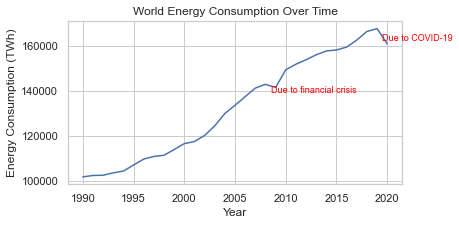

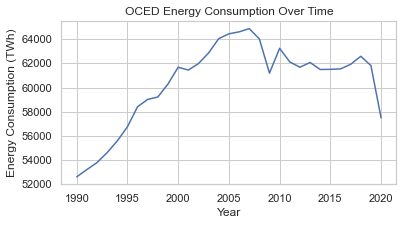

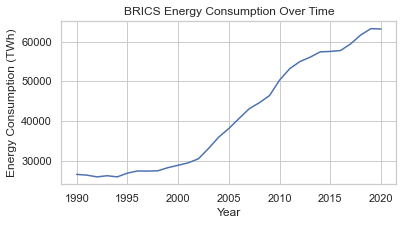

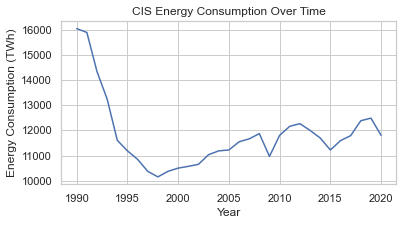

In [ ]:
# plotting World energy consumption over time
sns.set(style="whitegrid")
plt.figure(figsize=(6, 3))
sns.lineplot(data=conti_consu, x='Year', y='World')
plt.title('World Energy Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (TWh)')
plt.text(2019.5, 163000, 'Due to COVID-19', fontsize=9, va='center', color='red')
plt.text(2008.5, 140000, 'Due to financial crisis', fontsize=9, va='center', color='red')
plt.show()

# plotting the energy consumption of the OECD nations over time
sns.set(style="whitegrid")
plt.figure(figsize=(6, 3))
sns.lineplot(data=conti_consu, x='Year', y='OECD')
plt.title('OCED Energy Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (TWh)')
plt.show()

# plotting the energy consumption of the BRICS nations over time
sns.set(style="whitegrid")
plt.figure(figsize=(6, 3))
sns.lineplot(data=conti_consu, x='Year', y='BRICS')
plt.title('BRICS Energy Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (TWh)')
plt.show()

# plotting the energy consumption of the CIS nations over time
sns.set(style="whitegrid")
plt.figure(figsize=(6, 3))
sns.lineplot(data=conti_consu, x='Year', y='CIS')
plt.title('CIS Energy Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (TWh)')
plt.show()

In [ ]:
# creating World Consumption Annual growth rate for Visualisation
wrld_consu = conti_consu['World'].pct_change() * 100

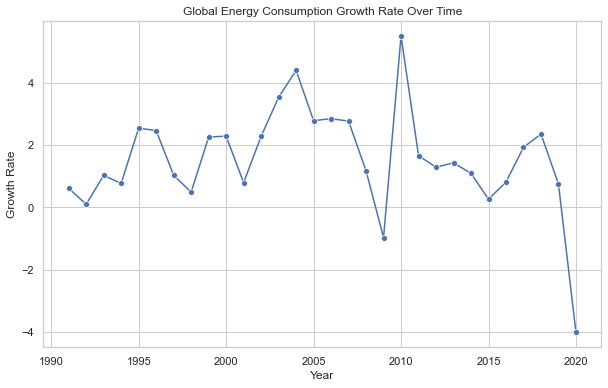

In [ ]:
# plotting World Consumption growth rate
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=conti_consu, x='Year', y=wrld_consu, marker="o")
plt.title('Global Energy Consumption Growth Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.show()

Energy consumption has consistently experienced an annual growth ranging from 0% to 4%, except for two notable exceptions: a decline of approximately -1.5% in 2008-2009 and a significant drop of about -4% between 2019 and 2020.

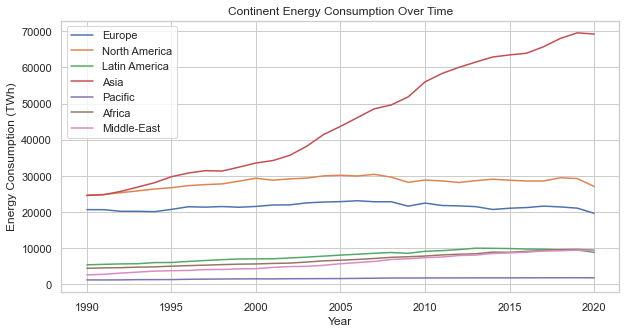

In [ ]:
# plotting the energy consumption of the continents
plt.figure(figsize=(10, 5))
for conti in ['Europe', 'North America', 'Latin America', 'Asia', 'Pacific', 'Africa', 'Middle-East']:
    sns.lineplot(data=conti_consu, x='Year', y=conti, label=conti)
plt.title('Continent Energy Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (TWh)')
plt.legend()
plt.show()

Summary of the above Charts;
- World energy consumption has generally **increased over time** from 1990 to 2020
- **OCED countries** have experienced a drop in energy usage since around 2006
- Energy consumption in the **BRICS nations** only started increasing about the year 2000
- **CIS** had a drop in energy consumption from 1990 to about 1998 and they have not consumed as much as in 1990 since then
- **Most continents** had a **consistent level of consumption** over time **except for Asia** where it appears there is a steady rise in energy usage since around 1992

### 2) Country Energy Consumption data (1990-2020)

In [ ]:
# checking shape of table and first few rows of Continent_Consumption data
print(f'country_consu has {country_consu.shape[0]} rows and {country_consu.shape[1]} columns')
country_consu.head()

country_consu has 33 rows and 45 columns


,Year,China,United States,Brazil,Belgium,Czechia,France,Germany,Italy,Netherlands,...,Australia,New Zealand,Algeria,Egypt,Nigeria,South Africa,Iran,Kuwait,Saudi Arabia,United Arab Emirates
0,1990.0,874.0,1910.0,141.0,48.0,50.0,225.0,351.0,147.0,67.0,...,86.0,14.0,22.0,33.0,66.0,90.0,69.0,9.0,58.0,20.0
1,1991.0,848.0,1925.0,143.0,50.0,45.0,237.0,344.0,150.0,69.0,...,85.0,14.0,23.0,33.0,70.0,92.0,77.0,3.0,68.0,23.0
2,1992.0,877.0,1964.0,145.0,51.0,44.0,234.0,338.0,149.0,69.0,...,87.0,14.0,24.0,34.0,72.0,88.0,81.0,9.0,77.0,22.0
3,1993.0,929.0,1998.0,148.0,49.0,43.0,238.0,335.0,149.0,70.0,...,91.0,15.0,24.0,35.0,74.0,94.0,87.0,12.0,80.0,23.0
4,1994.0,973.0,2036.0,156.0,52.0,41.0,231.0,333.0,147.0,70.0,...,91.0,15.0,23.0,34.0,72.0,98.0,97.0,14.0,84.0,26.0


In [ ]:
# checking for summary statistics
country_consu.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,31.0,2005.000000,9.092121,1990.0,1997.5,2005.0,2012.5,2020.0
China,31.0,1923.322581,898.856436,848.0,1076.5,1782.0,2866.5,3381.0
United States,31.0,2167.451613,114.081503,1910.0,2119.0,2191.0,2246.0,2338.0
Brazil,31.0,223.451613,55.459798,141.0,181.0,216.0,284.0,303.0
Belgium,31.0,54.903226,3.026052,48.0,53.0,56.0,57.0,60.0
Czechia,31.0,43.258065,2.190399,39.0,42.0,43.0,45.0,50.0
France,31.0,251.193548,13.639207,217.0,243.5,252.0,260.5,273.0
Germany,31.0,327.903226,18.396295,275.0,313.0,335.0,340.0,351.0
Italy,31.0,162.903226,14.022256,137.0,150.5,162.0,173.0,187.0
Netherlands,31.0,74.870968,3.981138,67.0,72.0,75.0,77.5,83.0


In [ ]:
# checking info of Country_Consumption table
country_consu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  31 non-null     float64
 1   China                 31 non-null     float64
 2   United States         31 non-null     float64
 3   Brazil                31 non-null     float64
 4   Belgium               31 non-null     float64
 5   Czechia               31 non-null     float64
 6   France                31 non-null     float64
 7   Germany               31 non-null     float64
 8   Italy                 31 non-null     float64
 9   Netherlands           31 non-null     float64
 10  Poland                31 non-null     float64
 11  Portugal              31 non-null     float64
 12  Romania               31 non-null     float64
 13  Spain                 31 non-null     float64
 14  Sweden                31 non-null     float64
 15  United Kingdom        31 

In [ ]:
# checking for NULLs in Continent_Consumption table
country_consu.isna().sum()

Year                    2
China                   2
United States           2
Brazil                  2
Belgium                 2
Czechia                 2
France                  2
Germany                 2
Italy                   2
Netherlands             2
Poland                  2
Portugal                2
Romania                 2
Spain                   2
Sweden                  2
United Kingdom          2
Norway                  2
Turkey                  2
Kazakhstan              2
Russia                  2
Ukraine                 2
Uzbekistan              2
Argentina               2
Canada                  2
Chile                   2
Colombia                2
Mexico                  2
Venezuela               2
Indonesia               2
Japan                   2
Malaysia                2
South Korea             2
Taiwan                  2
Thailand                2
India                   2
Australia               2
New Zealand             2
Algeria                 2
Egypt       

In [ ]:
# checking the bottom of our dataset
country_consu.tail()

,Year,China,United States,Brazil,Belgium,Czechia,France,Germany,Italy,Netherlands,...,Australia,New Zealand,Algeria,Egypt,Nigeria,South Africa,Iran,Kuwait,Saudi Arabia,United Arab Emirates
28,2018.0,3201.0,2236.0,288.0,53.0,43.0,246.0,302.0,151.0,73.0,...,128.0,20.0,61.0,96.0,160.0,134.0,266.0,34.0,214.0,78.0
29,2019.0,3309.0,2214.0,293.0,55.0,43.0,243.0,294.0,149.0,72.0,...,129.0,21.0,65.0,97.0,157.0,129.0,269.0,36.0,215.0,83.0
30,2020.0,3381.0,2046.0,286.0,51.0,39.0,217.0,275.0,137.0,70.0,...,126.0,21.0,59.0,92.0,159.0,124.0,268.0,38.0,209.0,81.0
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- There appears to be 2 NULL rows in all our columns in the Country Consumption dataset, we can drop them as we will still have 31 data points to work with in this dataset. Dropping them will also help us achieve a clean dataset for analysis.

In [ ]:
# dropping NULLs and checking new df for NULLs
count_consu = country_consu.dropna()
print(f'This new dataframe, count_consu, has {count_consu.shape[0]} rows and {count_consu.shape[1]} columns')
count_consu.isna().sum()

This new dataframe, count_consu, has 31 rows and 45 columns


Year                    0
China                   0
United States           0
Brazil                  0
Belgium                 0
Czechia                 0
France                  0
Germany                 0
Italy                   0
Netherlands             0
Poland                  0
Portugal                0
Romania                 0
Spain                   0
Sweden                  0
United Kingdom          0
Norway                  0
Turkey                  0
Kazakhstan              0
Russia                  0
Ukraine                 0
Uzbekistan              0
Argentina               0
Canada                  0
Chile                   0
Colombia                0
Mexico                  0
Venezuela               0
Indonesia               0
Japan                   0
Malaysia                0
South Korea             0
Taiwan                  0
Thailand                0
India                   0
Australia               0
New Zealand             0
Algeria                 0
Egypt       

In [ ]:
# checking for duplicate values
count_consu.duplicated().sum()

0

In [ ]:
# displaying new df
count_consu.head()

,Year,China,United States,Brazil,Belgium,Czechia,France,Germany,Italy,Netherlands,...,Australia,New Zealand,Algeria,Egypt,Nigeria,South Africa,Iran,Kuwait,Saudi Arabia,United Arab Emirates
0,1990.0,874.0,1910.0,141.0,48.0,50.0,225.0,351.0,147.0,67.0,...,86.0,14.0,22.0,33.0,66.0,90.0,69.0,9.0,58.0,20.0
1,1991.0,848.0,1925.0,143.0,50.0,45.0,237.0,344.0,150.0,69.0,...,85.0,14.0,23.0,33.0,70.0,92.0,77.0,3.0,68.0,23.0
2,1992.0,877.0,1964.0,145.0,51.0,44.0,234.0,338.0,149.0,69.0,...,87.0,14.0,24.0,34.0,72.0,88.0,81.0,9.0,77.0,22.0
3,1993.0,929.0,1998.0,148.0,49.0,43.0,238.0,335.0,149.0,70.0,...,91.0,15.0,24.0,35.0,74.0,94.0,87.0,12.0,80.0,23.0
4,1994.0,973.0,2036.0,156.0,52.0,41.0,231.0,333.0,147.0,70.0,...,91.0,15.0,23.0,34.0,72.0,98.0,97.0,14.0,84.0,26.0


In [ ]:
# checking for the unique years in our new df
count_consu["Year"].unique()

array([1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998.,
       1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007.,
       2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016.,
       2017., 2018., 2019., 2020.])

In [ ]:
# checking for summary statistics
count_consu.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,31.0,2005.000000,9.092121,1990.0,1997.5,2005.0,2012.5,2020.0
China,31.0,1923.322581,898.856436,848.0,1076.5,1782.0,2866.5,3381.0
United States,31.0,2167.451613,114.081503,1910.0,2119.0,2191.0,2246.0,2338.0
Brazil,31.0,223.451613,55.459798,141.0,181.0,216.0,284.0,303.0
Belgium,31.0,54.903226,3.026052,48.0,53.0,56.0,57.0,60.0
Czechia,31.0,43.258065,2.190399,39.0,42.0,43.0,45.0,50.0
France,31.0,251.193548,13.639207,217.0,243.5,252.0,260.5,273.0
Germany,31.0,327.903226,18.396295,275.0,313.0,335.0,340.0,351.0
Italy,31.0,162.903226,14.022256,137.0,150.5,162.0,173.0,187.0
Netherlands,31.0,74.870968,3.981138,67.0,72.0,75.0,77.5,83.0


### Visualising The Countries' Energy Consumption over the period of 1990-2020

In [ ]:
# checking mean of our 44 coutries to filter Countries above mean Consumption
gen_mean = count_consu.mean()
cou_mean = gen_mean[1:].mean()
cou_mean

225.96920821114372

In [ ]:
# extracting Countries that their mean consumption above the mean of the dataset
cou_abv_avg = count_consu.loc[:,count_consu.mean(axis=0) > cou_mean]
lst_cou = cou_abv_avg.columns[1:]
lst_cou

Index(['China', 'United States', 'France', 'Germany', 'Russia', 'Canada',
       'Japan', 'India'],
      dtype='object')

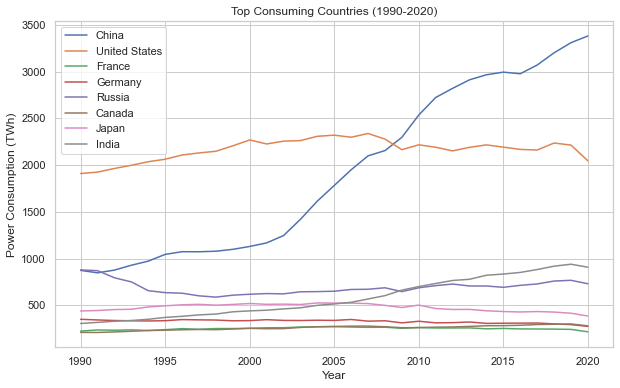

In [ ]:
# plotting energy consumption Countries that their mean consumption above the mean of the dataset
plt.figure(figsize=(10, 6))
for nation in lst_cou:
    sns.lineplot(data=cou_abv_avg, x='Year', y=nation, label=nation)

plt.title('Top Consuming Countries (1990-2020)')
plt.xlabel('Year')
plt.ylabel('Power Consumption (TWh)')
plt.legend()
plt.show()

- As we can see above that only **7 countries** ('China', 'United States', 'France', 'Germany', 'Russia', 'Canada', 'Japan', 'India') have their **average annual(btw 1990-2020) consumption above the mean consumption in our dataset**. This shows **low Renewable generation among the other 37 countries** in our dataset pointing to **slow and uneven Energy transition**.

### 3) Non-renewable Total Power Generation data (2017)

In [ ]:
# checking shape of table and viewing the rows of Non-renewable Total Power Generation table
print(f'nonrenew_tpg has {nonrenew_tpg.shape[0]} rows and {nonrenew_tpg.shape[1]} columns')
nonrenew_tpg

nonrenew_tpg has 8 rows and 2 columns


,Mode of Generation,Contribution (TWh)
0,Coal,9863.33
1,Natural Gas,5882.82
2,Nuclear,2636.03
3,Oil,841.87
4,Waste,114.04
5,Municipal Wastes,74.05
6,Others,36.02
7,Total,19448.16


In [ ]:
# checking info of Continent_Consumption table
nonrenew_tpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mode of Generation  8 non-null      object 
 1   Contribution (TWh)  8 non-null      float64
dtypes: float64(1), object(1)
memory usage: 256.0+ bytes


In [ ]:
# checking for NULLs and duplicates in renew_tpg
print(f"The number of duplicates in nonrenew_tpg is {nonrenew_tpg.duplicated().sum()}")
nonrenew_tpg.isna().sum()

The number of duplicates in nonrenew_tpg is 0


Mode of Generation    0
Contribution (TWh)    0
dtype: int64

- Due to the size of our dataset, it is easy to already notice the **absence** of NULLs or duplicate entries

In [ ]:
# checking for summary statistics
nonrenew_tpg.describe().T

,count,mean,std,min,25%,50%,75%,max
Contribution (TWh),8.0,4862.04,6852.377051,36.02,104.0425,1738.95,6877.9475,19448.16


### Visualising Total Power Generation from Non-renewable sources (2017)

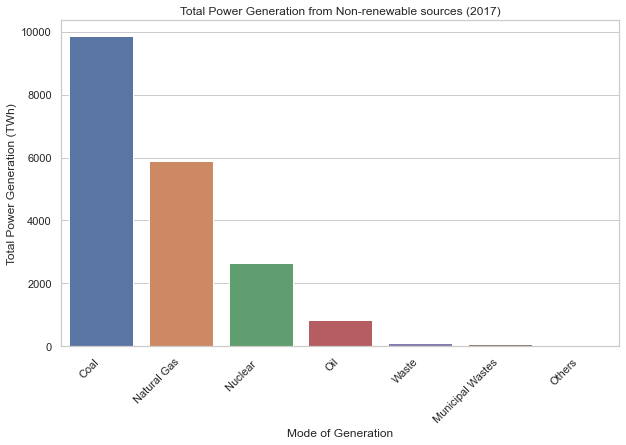

In [ ]:
# extracting the non-renewable sources without the 'Total' column
dfnr = nonrenew_tpg[nonrenew_tpg['Mode of Generation'] != 'Total']

# plotting the non-renewable total power generation
plt.figure(figsize=(10, 6))
sns.barplot(data = dfnr, x = dfnr['Mode of Generation'], y = dfnr['Contribution (TWh)'])
plt.title('Total Power Generation from Non-renewable sources (2017)')
plt.xlabel('Mode of Generation')
plt.ylabel('Total Power Generation (TWh)')
plt.xticks(rotation=45, ha='right')
plt.show()

The above chart gives some information about our dataset;

- Coal is the most explored non-renewable energy source
- Sources like Oil, Waste, Municipal Wastes and others(...) have very minimal usage

In [ ]:
# getting a sum of our Non-renewable energy generation
dfnr["Contribution (TWh)"].sum()

19448.16

### 4) Renewable Power Generation data (2017)

In [ ]:
# checking shape of table and viewing the rows of Renewable Total Power Generation table
print(f'renew_tpg has {renew_tpg.shape[0]} rows and {renew_tpg.shape[1]} columns')
renew_tpg

renew_tpg has 9 rows and 2 columns


,Mode of Generation,Contribution (TWh)
0,Hydro,9863.33
1,Wind,5882.82
2,Biofuel,2636.03
3,Solar PV,841.87
4,Geothermal,114.04
5,Renewable waste,74.05
6,Solar Thermal,36.02
7,Tidal,19448.16
8,Total,6384.25


In [ ]:
# checking for summary statistics
renew_tpg.describe().T

,count,mean,std,min,25%,50%,75%,max
Contribution (TWh),9.0,5031.174444,6429.863567,36.02,114.04,2636.03,6384.25,19448.16


In [ ]:
# checking info of Renewable Total Power Generation table
renew_tpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mode of Generation  9 non-null      object 
 1   Contribution (TWh)  9 non-null      float64
dtypes: float64(1), object(1)
memory usage: 272.0+ bytes


In [ ]:
# checking for NULLs and duplicates in renew_tpg
print(f"The number of duplicates in renew_tpg is {renew_tpg.duplicated().sum()}")
renew_tpg.isna().sum()

The number of duplicates in renew_tpg is 0


Mode of Generation    0
Contribution (TWh)    0
dtype: int64

In [ ]:
# investigating some values in our dataset, particularly 'Tidal' and 'Total'
print(f'Without including "Total", the sum of all our values is {renew_tpg.iloc[:-1, 1].sum()}')
print(f'But our "Total" value is {renew_tpg.iloc[-1, 1].sum()}')
print(f'Excluding "Total" and "Tidal", the sum of all our values is {renew_tpg.iloc[:-2, 1].sum()}')
print(f'Then the "Tidal" value is {renew_tpg.iloc[-2, 1].sum()}')

Without including "Total", the sum of all our values is 38896.32
But our "Total" value is 6384.25
Excluding "Total" and "Tidal", the sum of all our values is 19448.16
Then the "Tidal" value is 19448.16


Although our dataset is small and the **absence** of duplicate values and NULLs can be quickly spotted, there are some unclear values

- The value for 'Total' is not a sum of all the renewable energy sources, and
- The value for 'Tidal' is actually a sum of all the renewable energy sources ABOVE it

Team **NeuralNex** is theorizing that the values for "Tidal" and "Total" **could have been mixed up during the Data collection process**. However, for the purpose of **Data integrity**, the Team has concluded that **the two data points should be dropped** since they are **inaccurate and inconsistent with the others** and also there are sufficient data points in our dataset aside these two.

In [ ]:
# dropping "Tidal" and "Total" rows and creating a new df
rnw_tpg = renew_tpg[(renew_tpg["Mode of Generation"] != "Tidal") & (renew_tpg["Mode of Generation"] != "Total")]
rnw_tpg

,Mode of Generation,Contribution (TWh)
0,Hydro,9863.33
1,Wind,5882.82
2,Biofuel,2636.03
3,Solar PV,841.87
4,Geothermal,114.04
5,Renewable waste,74.05
6,Solar Thermal,36.02


In [ ]:
# getting total renewable power for our new df "rnw_tpg"
rnw_tpg["Contribution (TWh)"].sum()

# creating a df "rnw_no" that has values for the four(4) renewables we are focusing on - Hydro, Biofuel, Solar PV and Geothermal
rnw_no = rnw_tpg[(rnw_tpg["Mode of Generation"] != "Wind") & (rnw_tpg["Mode of Generation"] != "Renewable waste") & (rnw_tpg["Mode of Generation"] != "Solar Thermal")]
rnw_no["Mode of Generation"].values
rnw_no["Contribution (TWh)"].sum()

13455.270000000002

In [ ]:
# checking for summary stats of the new df
rnw_tpg.describe().T

,count,mean,std,min,25%,50%,75%,max
Contribution (TWh),7.0,2778.308571,3775.734927,36.02,94.045,841.87,4259.425,9863.33


### Visualising Total Power Generation from Renewable sources (2017)

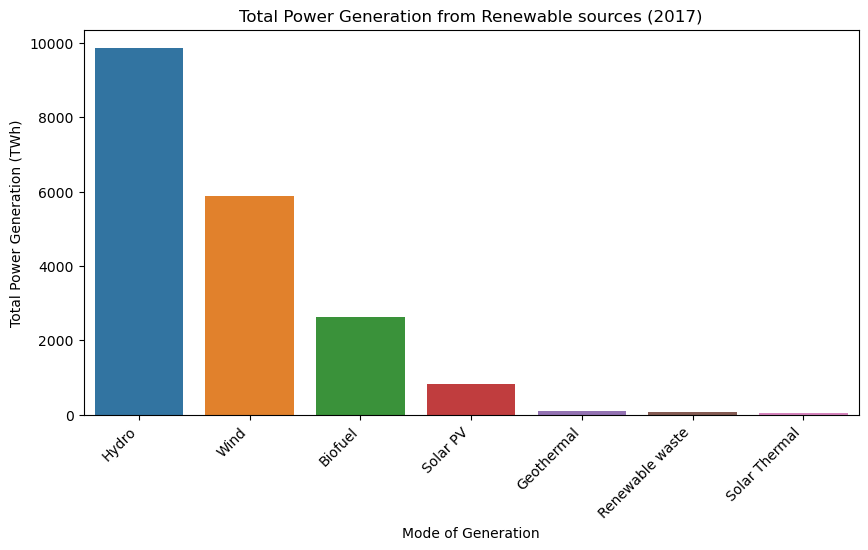

In [ ]:
# plotting the renewable total power generation
plt.figure(figsize=(10, 5))
sns.barplot(data = rnw_tpg, x = rnw_tpg['Mode of Generation'], y = rnw_tpg['Contribution (TWh)'])
plt.title('Total Power Generation from Renewable sources (2017)')
plt.xlabel('Mode of Generation')
plt.ylabel('Total Power Generation (TWh)')
plt.xticks(rotation=45, ha='right')
plt.show()

Our bar Chart above gives us some insight;

- **Hydro** is the **most explored** renewable energy source
- Renewable sources like **Geothermal, Renewable waste** and **Solar thermal** have **low usage**

## 5) Renewable Power Generation (1990-2017)

In [ ]:
# checking shape of table and viewing the first few rows of Renewable Power Generation (1997-2017) table
print(f'renew_pg90 has {renew_pg90.shape[0]} rows and {renew_pg90.shape[1]} columns')
renew_pg90.head()

renew_pg90 has 28 rows and 5 columns


,Year,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh)
0,1990,2191.67,3.88,0.09,36.42
1,1991,2268.63,4.19,0.10,37.39
2,1992,2267.16,4.63,0.12,39.30
3,1993,2397.67,5.61,0.15,40.23
4,1994,2419.73,7.31,0.17,41.05


In [ ]:
renew_pg90["Year"].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

In [ ]:
# checking info of Renewable Power Generation(1990-2017) table
renew_pg90.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              28 non-null     int64  
 1   Hydro(TWh)        28 non-null     float64
 2   Biofuel(TWh)      28 non-null     float64
 3   Solar PV (TWh)    28 non-null     float64
 4   Geothermal (TWh)  28 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.2 KB


In [ ]:
# checking for NULLs and duplicates in renew_pg90
print(f"The number of duplicates in renew_pg90 is {renew_pg97.duplicated().sum()}")
renew_pg90.isna().sum()

The number of duplicates in renew_pg90 is 0


Year                0
Hydro(TWh)          0
Biofuel(TWh)        0
Solar PV (TWh)      0
Geothermal (TWh)    0
dtype: int64

In [ ]:
# checking for summary statistics
renew_pg90.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,28.0,2003.500000,8.225975,1990.00,1996.7500,2003.500,2010.2500,2017.00
Hydro(TWh),28.0,2974.167500,595.936814,2191.67,2598.6300,2718.725,3298.8975,4197.29
Biofuel(TWh),28.0,245.032500,329.275399,3.88,11.4225,74.330,365.0375,1127.31
Solar PV (TWh),28.0,57.430000,113.343588,0.09,0.2575,2.335,40.1050,443.55
Geothermal (TWh),28.0,57.014286,14.850555,36.42,42.3300,55.295,68.3975,85.34


In [ ]:
# checking for correlation between our variables
renew_pg90.corr()

,Year,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh)
Year,1.000000,0.894416,0.862977,0.715965,0.990005
Hydro(TWh),0.894416,1.000000,0.870333,0.795868,0.916762
Biofuel(TWh),0.862977,0.870333,1.000000,0.953079,0.908150
Solar PV (TWh),0.715965,0.795868,0.953079,1.000000,0.780185
Geothermal (TWh),0.990005,0.916762,0.908150,0.780185,1.000000


In [ ]:
# checking a df created earlier with the four(4) renewables we are focusing on
rnw_no.head()

,Mode of Generation,Contribution (TWh)
0,Hydro,9863.33
2,Biofuel,2636.03
3,Solar PV,841.87
4,Geothermal,114.04


In [ ]:
# verifying if there was any year between 1990-2017 where the total renewable generation matched our Total Renewable Generation(2017) dataset
tots_pg = renew_pg90["Hydro(TWh)"] + renew_pg90["Biofuel(TWh)"] + renew_pg90["Solar PV (TWh)"] + renew_pg90["Geothermal (TWh)"]
tots_pg
renew_pg90[tots_pg == rnw_no["Contribution (TWh)"].sum()]

,Year,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh)


- This shows that the figures from our **Renewable Total Power Generation(2017)** dataset does not match any year's value in our **Renewable Power Generation(1990-2017)** dataset. Based on this, the Team has decided to not consider the data in the **Renewable Total Power Generation(2017)** since it does not tally with the other dataset and it is supposedly only representative of 2017. There is also a concern that the values in it are identical to those in the **Non-Renewable Total Power Generation(2017)**

### Visualising Renewable Power Generation (1990-2017)

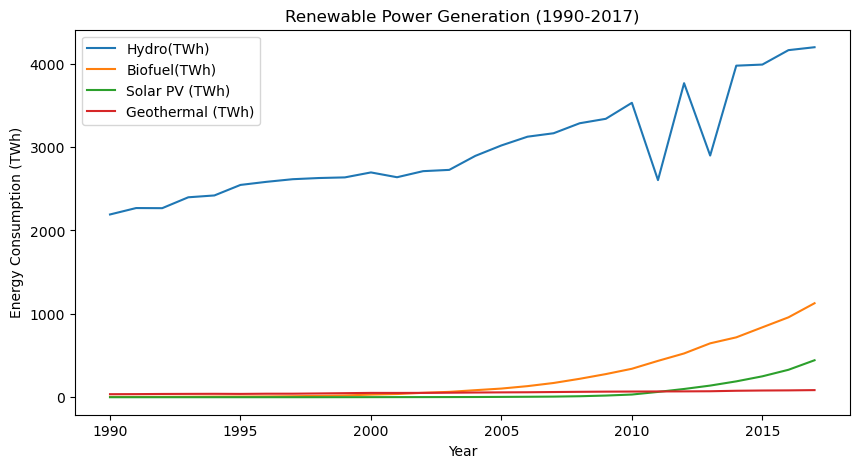

In [ ]:
# plotting the Renewable Power Generation (1990-2017)
plt.figure(figsize=(10, 5))
for source in ['Hydro(TWh)', 'Biofuel(TWh)', 'Solar PV (TWh)', 'Geothermal (TWh)']:
    sns.lineplot(data=renew_pg90, x='Year', y=source, label=source)
plt.title('Renewable Power Generation (1990-2017)')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (TWh)')
plt.legend()
plt.show()

Deductions from the Chart above;

- We see the **high level of contribution** of **Hydro** among the other renewable energy sources between 1990 and 2017 clearly indicating that it was the **main source of renewable energy**.
- However, there were dips in Hydro generation around 2011 and 2013
- The **other three(3) renewable sources** in our dataset **began experiencing significant growth from around 2005**, of which **Biofuel has made the most progress** although it stills looks like **a long way away from doing as much as Hydro**.


**We can take a closer look at each of the four(4) Renewables*

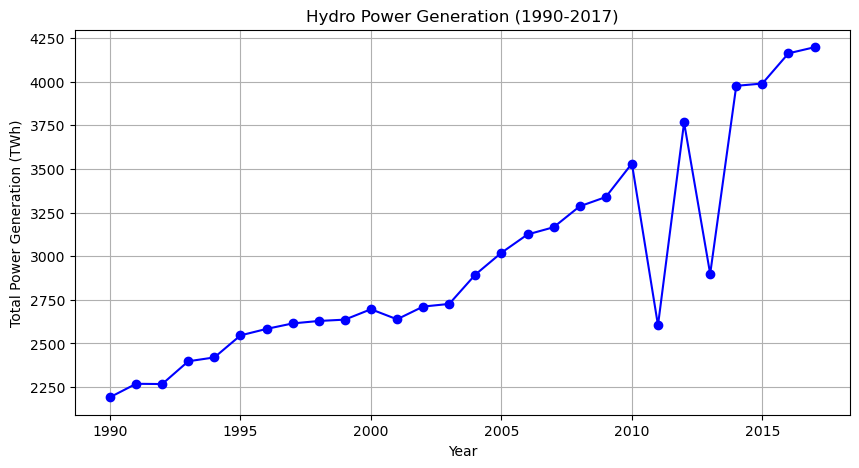

In [ ]:
# plotting the Hydro power generation over time
plt.figure(figsize=(10, 5))
plt.plot(renew_pg90["Year"], renew_pg90["Hydro(TWh)"], marker='o', color='blue')
plt.title('Hydro Power Generation (1990-2017)')
plt.xlabel('Year')
plt.ylabel('Total Power Generation (TWh)')
plt.grid(True)
plt.show()

#### Hydro Power Generation (TWh):

- **Trend** : The hydro power generation shows a generally increasing trend over the years, with a slight dip around 2011. There is a noticeable upward trajectory, indicating a consistent growth in hydroelectric power production.



- **Insights** : The increase in hydro power generation suggests a growing reliance on this renewable energy source, likely driven by its reliability and sustainability. The dip in 2011 might be attributed to external factors or changes in energy policies.

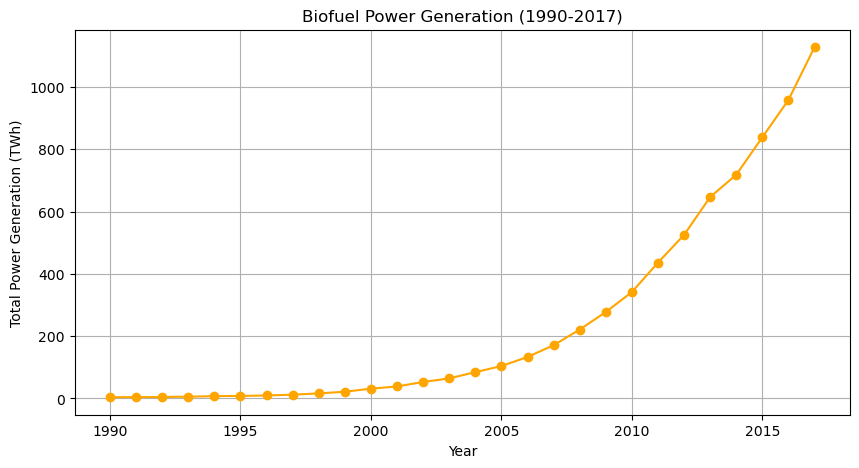

In [ ]:
# plotting the Biofuel power generation over time
plt.figure(figsize=(10, 5))
plt.plot(renew_pg90["Year"], renew_pg90["Biofuel(TWh)"], marker='o', color='orange')
plt.title('Biofuel Power Generation (1990-2017)')
plt.xlabel('Year')
plt.ylabel('Total Power Generation (TWh)')
plt.grid(True)
plt.show()

#### Biofuel Power Generation (TWh):

**Trend**: Biofuel power generation has experienced a steady increase over the years, with a significant rise in the later years. The growth is more pronounced compared to other energy sources.


**Insights**: The substantial growth in biofuel power generation reflects a shift towards bioenergy as a viable and environmentally friendly alternative. Biofuels, derived from organic materials, contribute to the renewable energy mix, addressing concerns about the environmental impact of traditional fossil fuels

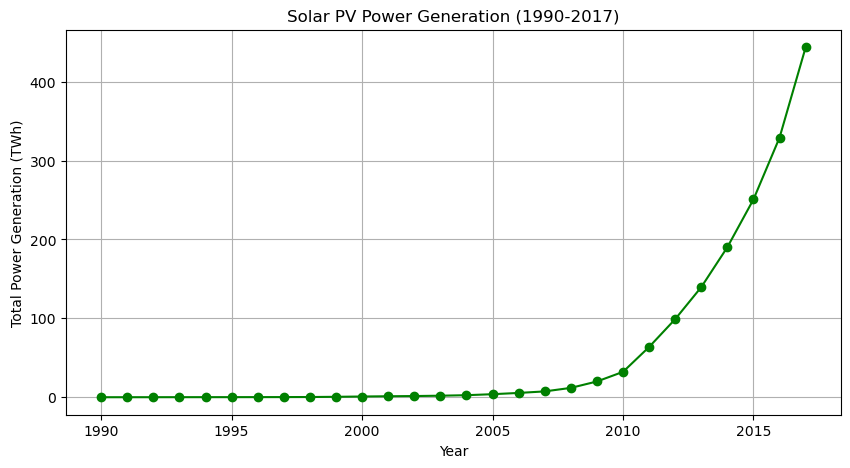

In [ ]:
# plotting the Solar PV power generation over time
plt.figure(figsize=(10, 5))
plt.plot(renew_pg90["Year"], renew_pg90["Solar PV (TWh)"], marker='o', color='green')
plt.title('Solar PV Power Generation (1990-2017)')
plt.xlabel('Year')
plt.ylabel('Total Power Generation (TWh)')
plt.grid(True)
plt.show()

#### Solar PV Power Generation (TWh):

**Trend**: Solar PV power generation exhibits a remarkable upward trend, especially from the early 2000s onwards. The growth is exponential, indicating a surge in solar energy adoption.


**Insights**: The rapid increase in solar PV power generation suggests a strong push towards solar energy as a key component of the renewable energy mix. Solar power, harnessed from the sun's rays, is a cornerstone in the transition to sustainable energy and plays a pivotal role in reducing reliance on non-renewable sources.


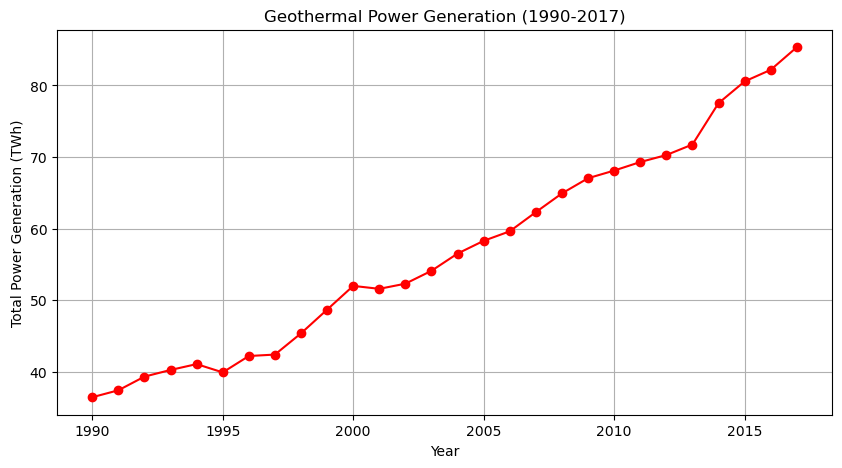

In [ ]:
# plotting the Geothermal power generation over time
plt.figure(figsize=(10, 5))
plt.plot(renew_pg90["Year"], renew_pg90["Geothermal (TWh)"], marker='o', color='red')
plt.title('Geothermal Power Generation (1990-2017)')
plt.xlabel('Year')
plt.ylabel('Total Power Generation (TWh)')
plt.grid(True)
plt.show()

**Geothermal Power Generation (TWh):**


- **Trend**: Geothermal power generation demonstrates a gradual but consistent rise over the years, with a moderate increase in the later years.



- **Insights** : The steady growth in geothermal power generation indicates a sustained interest in harnessing the Earth's heat for energy production. Geothermal energy, a reliable and renewable source, contributes to the broader strategy of diversifying the energy portfolio and reducing dependence on finite fossil fuels.

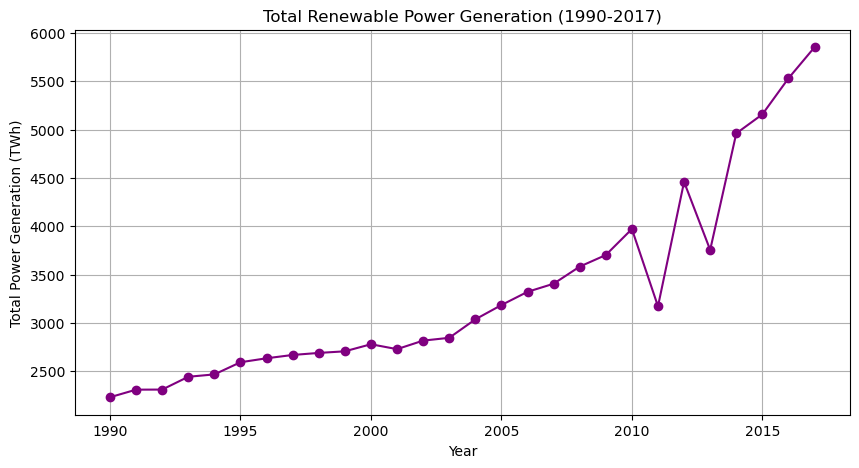

In [ ]:
# plotting the total renewable power generation over time
plt.figure(figsize=(10, 5))
plt.plot(renew_pg90["Year"], tots_pg, marker='o', color='purple')
plt.title('Total Renewable Power Generation (1990-2017)')
plt.xlabel('Year')
plt.ylabel('Total Power Generation (TWh)')
plt.grid(True)
plt.show()

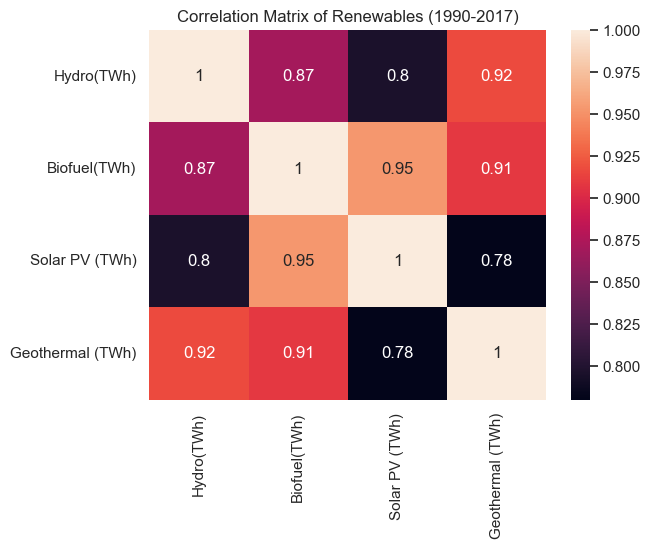

In [ ]:
# plotting the Correlation Analysis for Renewable Power Generation(1990-2017)
correlation_mat = renew_pg90[['Hydro(TWh)', 'Biofuel(TWh)', 'Solar PV (TWh)', 'Geothermal (TWh)']].corr()
sns.heatmap(correlation_mat, annot=True)
plt.title('Correlation Matrix of Renewables (1990-2017)')
plt.show()

This heatmap of correlation analysis reveals that the Renewable Power Generation Sources have **strong positive relationships with each other**.

The lowest correlation observed is 0.78, indicating a high level of positive association. This suggests that the variables tend to move together in the same direction.

Understanding these strong correlations is important for making informed decisions in infrastructure planning and energy management, as changes in one variable are likely to influence others in a significant and consistent manner.

## 6) Top 20 Countries Power Generation dataset (2017)

In [ ]:
# checking shape of table and viewing the first few rows of Top 20 Countries Power Generation table
print(f'top20_cpg has {top20_cpg.shape[0]} rows and {top20_cpg.shape[1]} columns')
top20_cpg.head()

top20_cpg has 20 rows and 6 columns


,Country,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh),Total (TWh)
0,China,1189.84,295.02,79.43,0.125,1819.940
1,USA,315.62,277.91,58.95,18.960,758.619
2,Brazil,370.90,42.37,52.25,0.000,466.350
3,Canada,383.48,29.65,7.12,0.000,424.090
4,India,141.80,51.06,43.76,0.000,262.650


In [ ]:
# checking for the accuracy of the provided "Total" column
top20_cpg["Calculated Total(TWh)"] = top20_cpg["Hydro(TWh)"] + top20_cpg["Biofuel(TWh)"] + top20_cpg["Solar PV (TWh)"] + top20_cpg["Geothermal (TWh)"]
top20_cpg["Total difference"] = top20_cpg["Total (TWh)"] - top20_cpg["Calculated Total(TWh)"]
top20_cpg.head()

,Country,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh),Total (TWh),Calculated Total(TWh),Total difference
0,China,1189.84,295.02,79.43,0.125,1819.940,1564.415,255.525
1,USA,315.62,277.91,58.95,18.960,758.619,671.440,87.179
2,Brazil,370.90,42.37,52.25,0.000,466.350,465.520,0.830
3,Canada,383.48,29.65,7.12,0.000,424.090,420.250,3.840
4,India,141.80,51.06,43.76,0.000,262.650,236.620,26.030


- It appears that the **"Total" column** initially provided in our dataset is **not an accurate summation** of all the renewables values for each country

In [ ]:
# checking info of Top 20 Countries Power Generation table
top20_cpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                20 non-null     object 
 1   Hydro(TWh)             20 non-null     float64
 2   Biofuel(TWh)           20 non-null     float64
 3   Solar PV (TWh)         20 non-null     float64
 4   Geothermal (TWh)       20 non-null     float64
 5   Total (TWh)            20 non-null     float64
 6   Calculated Total(TWh)  20 non-null     float64
 7   Total difference       20 non-null     float64
dtypes: float64(7), object(1)
memory usage: 1.4+ KB


In [ ]:
# checking for NULLs and duplicates in top20_cpg
print(f"The number of duplicates in top20 is {top20_cpg.duplicated().sum()}")
top20_cpg.isna().sum()

The number of duplicates in top20 is 0


Country                  0
Hydro(TWh)               0
Biofuel(TWh)             0
Solar PV (TWh)           0
Geothermal (TWh)         0
Total (TWh)              0
Calculated Total(TWh)    0
Total difference         0
dtype: int64

In [ ]:
# checking for summary statistics
top20_cpg.describe().T

,count,mean,std,min,25%,50%,75%,max
Hydro(TWh),20.0,151.849500,273.122956,7.2800,15.77750,43.83000,153.1325,1189.840
Biofuel(TWh),20.0,51.149530,85.071233,0.0006,2.27750,18.68500,50.8725,295.020
Solar PV (TWh),20.0,19.828000,23.726242,0.0200,2.44250,6.97000,35.0000,79.430
Geothermal (TWh),20.0,2.667255,5.127413,0.0000,0.00000,0.06255,3.1700,18.960
Total (TWh),20.0,254.826935,413.203988,12.4000,43.87515,112.03000,236.0475,1819.940
Calculated Total(TWh),20.0,225.494285,360.159110,10.7100,33.93015,95.09000,199.9900,1564.415
Total difference,20.0,29.332650,58.166714,0.0800,3.67750,9.34000,23.4950,255.525


In [ ]:

top20_cpg['Total_calculated'] = top20_cpg['Hydro(TWh)']+top20_cpg['Biofuel(TWh)']+top20_cpg['Solar PV (TWh)']+top20_cpg['Geothermal (TWh)']
top20_cpg['% excess in total']=(top20_cpg['Total (TWh)']-top20_cpg['Total_calculated'])/top20_cpg['Total_calculated']*100
top20_cpg

,Country,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh),Total (TWh),Total_calculated,% excess in total
0,China,1189.84,295.0200,79.43,0.1250,1819.9400,1564.4150,16.333582
1,USA,315.62,277.9100,58.95,18.9600,758.6190,671.4400,12.983885
2,Brazil,370.90,42.3700,52.25,0.0000,466.3500,465.5200,0.178295
3,Canada,383.48,29.6500,7.12,0.0000,424.0900,420.2500,0.913742
4,India,141.80,51.0600,43.76,0.0000,262.6500,236.6200,11.000761
5,Germany,24.17,111.5900,45.10,0.1600,227.1800,181.0200,25.499945
6,Russia,187.13,0.1400,0.08,0.4300,188.3300,187.7800,0.292896
7,Japan,90.67,7.6300,19.01,2.4400,187.3490,119.7500,56.450104
8,France,70.13,28.5000,5.87,0.1300,114.8200,104.6300,9.739081
9,Italy,50.92,17.4900,16.85,6.0800,113.9900,91.3400,24.797460


In [ ]:
for i in range(0,len(top20_cpg)):
    if top20_cpg['Country'][i]=='UK':
        top20_cpg['Country'][i]='United Kingdom'
    elif top20_cpg['Country'][i]=='USA':
        top20_cpg['Country'][i]='United States'
    else:
        pass

<ipython-input-32-12e34088a227>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top20_cpg['Country'][i]='United States'
<ipython-input-32-12e34088a227>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top20_cpg['Country'][i]='United Kingdom'


In [ ]:
top20_cpg['Consumption']=range(0,len(top20_cpg))
g=0
for i in top20_cpg['Country'].unique():
    top20_cpg['Consumption'][g]=float(country_consu[country_consu['Year']==2017][i].values)
    g=g+1

<ipython-input-35-b2cdd93b6b2a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top20_cpg['Consumption'][g]=float(country_consu[country_consu['Year']==2017][i].values)
<ipython-input-35-b2cdd93b6b2a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top20_cpg['Consumption'][g]=float(country_consu[country_consu['Year']==2017][i].values)
<ipython-input-35-b2cdd93b6b2a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top20_cpg['Consumpti

In [ ]:
top20_cpg.head()

,Country,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh),Total (TWh),Total_calculated,% excess in total,Consumption
0,China,1189.84,295.02,79.43,0.125,1819.940,1564.415,16.333582,3070
1,United States,315.62,277.91,58.95,18.960,758.619,671.440,12.983885,2161
2,Brazil,370.90,42.37,52.25,0.000,466.350,465.520,0.178295,292
3,Canada,383.48,29.65,7.12,0.000,424.090,420.250,0.913742,295
4,India,141.80,51.06,43.76,0.000,262.650,236.620,11.000761,883


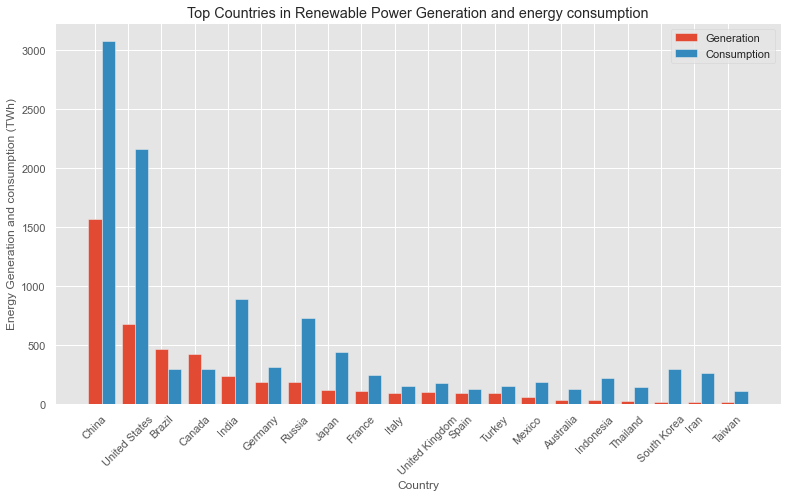

In [ ]:
plt.figure(figsize=(13,7))
plt.style.use('ggplot')
width=0.4
col2=['Total_calculated', 'Consumption']
Country_axis = np.arange(len(top20_cpg['Country']))
bottom=None
plt.bar(Country_axis,top20_cpg[col2[0]], width=width,label='Generation')
plt.bar(Country_axis+width,top20_cpg[col2[1]],width=width,label='Consumption')
#     if bottom is None:
#         bottom = top_countries[col]
#     else:
#         bottom += top_countries[col]
plt.title('Top Countries in Renewable Power Generation and energy consumption')
plt.xlabel('Country')
plt.ylabel('Energy Generation and consumption (TWh)')
plt.xticks(Country_axis, top20_cpg['Country'],rotation=45,)
# plt.xticks(rotation=45, ha='right')  # Rotate country names for better visibility
plt.legend()
plt.show()

### Visualising the Top 20 Countries Renewable Power Generation (2017)

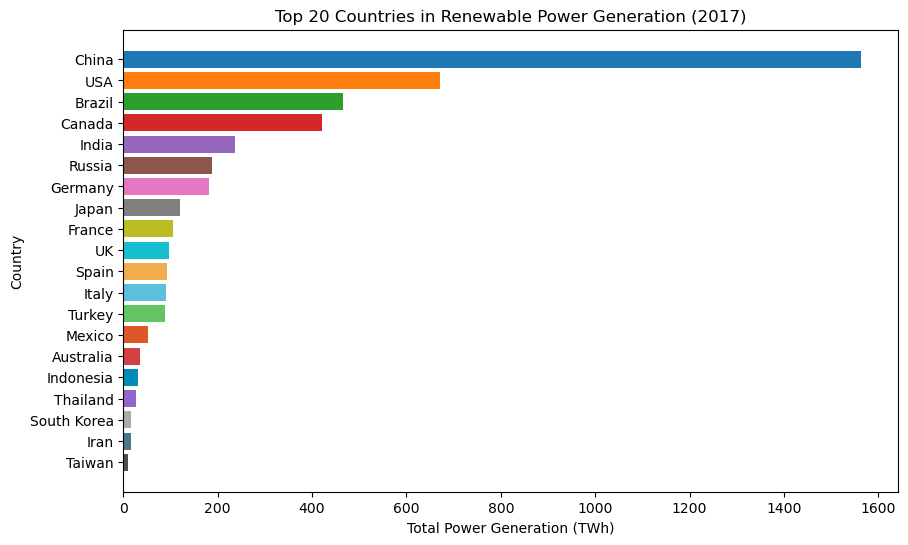

In [ ]:
# creating a list of colors for each country in the bar chart
colors = ['#4f4f4f', '#4a798a', '#ababab', '#9166cc', '#008cba', '#d43f41', '#dd5826', '#62c462', '#5bc0de', '#f0ad4e', '#17becf', '#bcbd22', '#7f7f7f', '#e377c2', '#8c564b', '#9467bd', '#d62728', '#2ca02c', '#ff7f0e', '#1f77b4']

# sorting the 20 countries by total power generation in ascending order
sort_top20 = top20_cpg.sort_values(by='Calculated Total(TWh)')

# creating a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(sort_top20['Country'], sort_top20['Calculated Total(TWh)'], color=colors)

# setting labels and title
plt.xlabel('Total Power Generation (TWh)')
plt.ylabel('Country')
plt.title('Top 20 Countries in Renewable Power Generation (2017)')

# displaying the plot
plt.show()

In [ ]:
plt.figure(figsize=(13,7))
plt.style.use('ggplot')
width=0.4
col2=['ratio']
Country_axis = np.arange(len(df4['Country']))
bottom=None
plt.bar(Country_axis,df4[col2[0]], width=width)
# plt.bar(Country_axis+width,df4[col2[1]],width=width,label='Consumption')
#     if bottom is None:
#         bottom = top_countries[col]
#     else:
#         bottom += top_countries[col]
plt.title('Ratio of Energy generation to consumption for Top Countries in Renewable Power Generation for 2017')
plt.xlabel('Country')
plt.ylabel('Energy Generation and consumption (TWh)')
plt.xticks(Country_axis, df4['Country'],rotation=45,)
# plt.xticks(rotation=45, ha='right')  # Rotate country names for better visibility
plt.legend()
plt.show()

From this Chart, we see that;

- China has a disproportionately larger amount of Renewable energy generation as compared to the other 19 countries

#### Comparing countries that generated below 500TWh and at least 500TWh in Renewable Energy

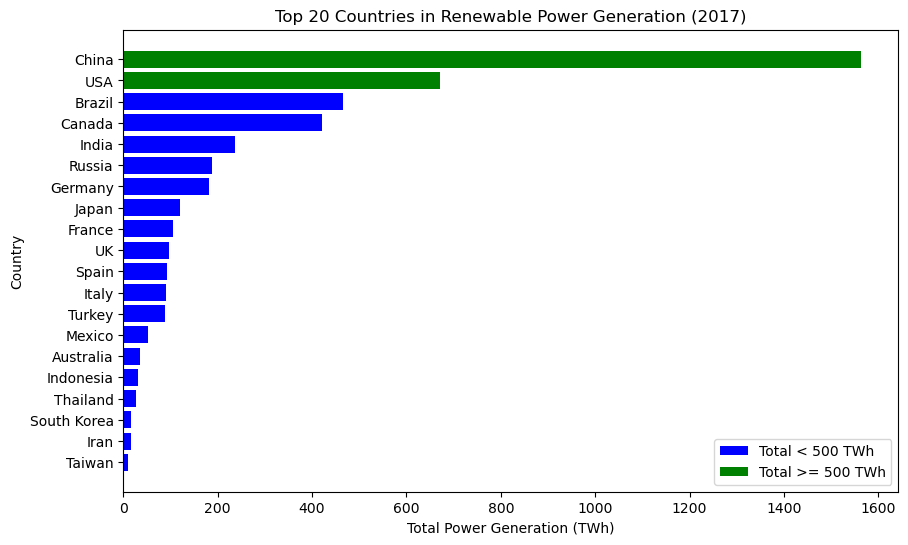

In [ ]:
# defining different colors for below and above 500 TWh
diff_colors = ['blue', 'green']

# filtering the data for countries with less than 500 TWh and more than 500 TWh
below_500 = top20_cpg[top20_cpg['Calculated Total(TWh)'] < 500]
above_500 = top20_cpg[top20_cpg['Calculated Total(TWh)'] >= 500]

# sorting the data by total power generation in ascending order
below_500 = below_500.sort_values(by='Calculated Total(TWh)')
above_500 = above_500.sort_values(by='Calculated Total(TWh)')

# creating a bar chart
plt.figure(figsize=(10, 6))

# plotting countries with less than 500 TWh using the first color
plt.barh(below_500['Country'], below_500['Calculated Total(TWh)'], label='Total < 500 TWh', color=diff_colors[0])

# plotting countries with more than or equal to 500 TWh using the second color
plt.barh(above_500['Country'], above_500['Calculated Total(TWh)'], label='Total >= 500 TWh', color=diff_colors[1])

# setting labels and title
plt.xlabel('Total Power Generation (TWh)')
plt.ylabel('Country')
plt.title('Top 20 Countries in Renewable Power Generation (2017)')

# displaing the legend and plot
plt.legend()
plt.show()

The Chart above shows that;

- **Only 10%(2)** of the top 20 Renewable energy-generating countries as at 2017 **produce at least 500TWh**
- It appears that renewable energy **adoption is not proportionate** and the larger group(18 countries) is **struggling with generating Renewable energy above 500 TWh**

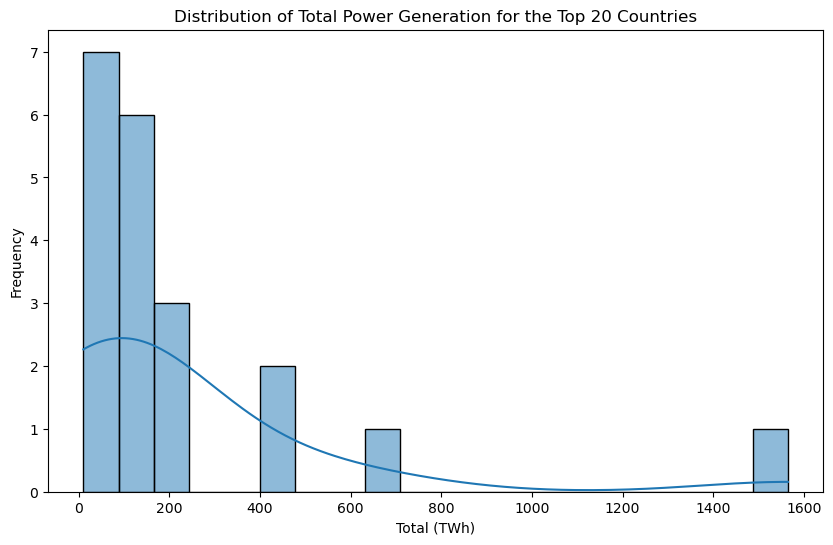

In [ ]:
# plotting distribution of top 20 Renewable energy countries for 2017
plt.figure(figsize=(10, 6))
sns.histplot(data=top20_cpg, x= 'Calculated Total(TWh)', bins=20, kde=True)
plt.title('Distribution of Total Power Generation for the Top 20 Countries')
plt.xlabel('Total (TWh)')
plt.ylabel('Frequency')
plt.show()

This histogram above offers a visual insight into the distribution of total power generation across the leading 20 countries in our dataset. This distribution reveals a pronounced **right-skewness**, which means that the **majority of these nations exhibit lower levels of total power generation**, while a select **few are responsible for a disproportionately significant share** of the total power output.

Understanding this right-skewed distribution is critical for strategic infrastructure planning and allocation of energy resources. It underscores the importance of **diversifying power generation sources** and ensuring a more balanced and resilient energy landscape.

## Objective 1: Which types of renewables are improving the fastest?



#### We will analyze the 'Renewables Power Generation' dataset to identify the rate of improvement for various renewable energy sectors over the 1990-2017 period.
- To determine which types of renewables are improving the fastest, we will analyze the growth rate or percentage increase for each renewable energy source over the years. The formula we used for calculating the growth rate is:

### Growth Rate = [ ( Current Value − Initial Value) / Initial Value ] × 100


Here, the "Initial Value" is the power generation in the previous year, and the "Current Value" is the power generation in the year in review.

In [ ]:
# calculating the growth rate for each renewable energy source
renew_pg90['Hydro Growth Rate(%)'] = ((renew_pg90['Hydro(TWh)'] - renew_pg90['Hydro(TWh)'].shift(1)) / renew_pg90['Hydro(TWh)'].shift(1)) * 100
renew_pg90['Biofuel Growth Rate(%)'] = ((renew_pg90['Biofuel(TWh)'] - renew_pg90['Biofuel(TWh)'].shift(1)) / renew_pg90['Biofuel(TWh)'].shift(1)) * 100
renew_pg90['Solar PV Growth Rate(%)'] = ((renew_pg90['Solar PV (TWh)'] - renew_pg90['Solar PV (TWh)'].shift(1)) / renew_pg90['Solar PV (TWh)'].shift(1)) * 100
renew_pg90['Geothermal Growth Rate(%)'] = ((renew_pg90['Geothermal (TWh)'] - renew_pg90['Geothermal (TWh)'].shift(1)) / renew_pg90['Geothermal (TWh)'].shift(1)) * 100

# rounding the growth rates to two decimal places
data_rou = renew_pg90.round({'Hydro Growth Rate(%)': 2, 'Biofuel Growth Rate(%)': 2, 'Solar PV Growth Rate(%)': 2, 'Geothermal Growth Rate(%)': 2})


# displaying the growth rates in a table
growth_rate = data_rou[['Year', 'Hydro Growth Rate(%)', 'Biofuel Growth Rate(%)', 'Solar PV Growth Rate(%)', 'Geothermal Growth Rate(%)']]
growth_rate_table = growth_rate.fillna(0) # handling cases of first-year rate
growth_rate_table.head()

,Year,Hydro Growth Rate(%),Biofuel Growth Rate(%),Solar PV Growth Rate(%),Geothermal Growth Rate(%)
0,1990,0.00,0.00,0.00,0.00
1,1991,3.51,7.99,11.11,2.66
2,1992,-0.06,10.50,20.00,5.11
3,1993,5.76,21.17,25.00,2.37
4,1994,0.92,30.30,13.33,2.04


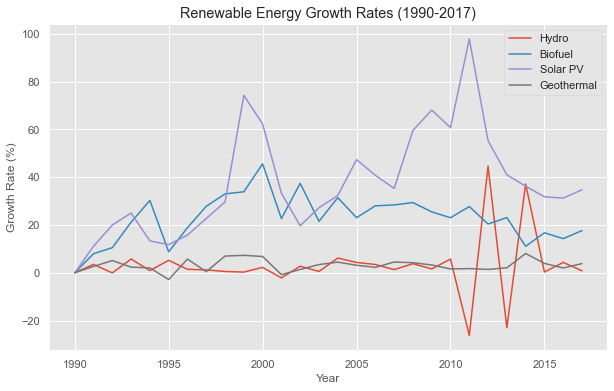

In [ ]:
# plotting the growth rates
plt.figure(figsize=(10, 6))

plt.plot(growth_rate_table['Year'], growth_rate_table['Hydro Growth Rate(%)'], label='Hydro')
plt.plot(growth_rate_table['Year'], growth_rate_table['Biofuel Growth Rate(%)'], label='Biofuel')
plt.plot(growth_rate_table['Year'], growth_rate_table['Solar PV Growth Rate(%)'], label='Solar PV')
plt.plot(growth_rate_table['Year'], growth_rate_table['Geothermal Growth Rate(%)'], label='Geothermal')

plt.title('Renewable Energy Growth Rates (1990-2017)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

### Visualising market shares of the Renewables

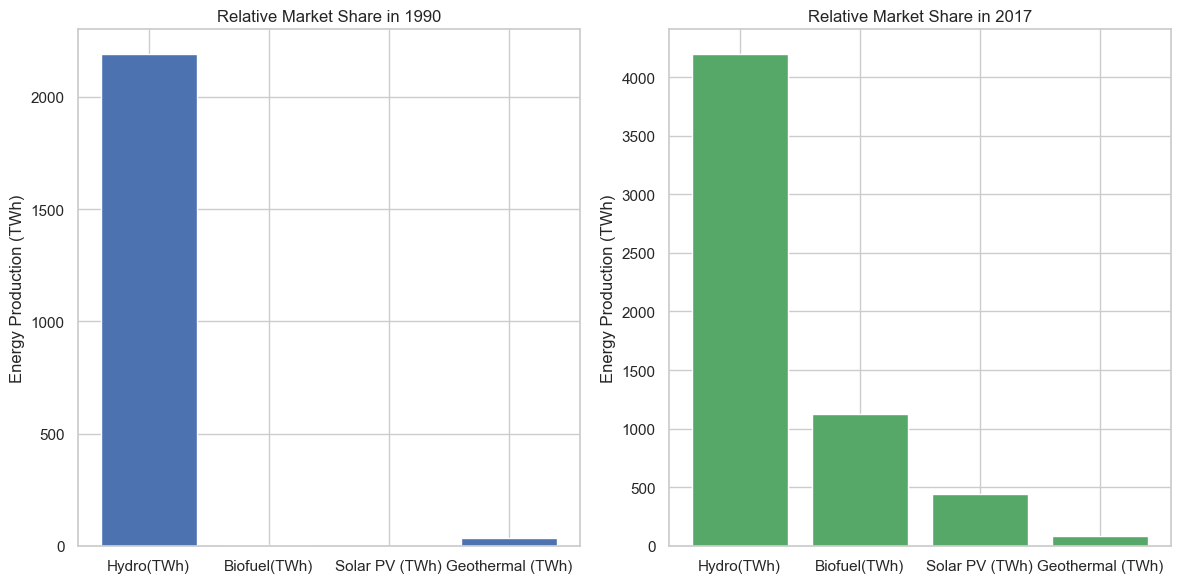

In [ ]:
# creating a bar chart to visualize relative market share in 1990 and 2017
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# plotting the relative market share in 1990
df_1990 = renew_pg90[['Hydro(TWh)', 'Biofuel(TWh)', 'Solar PV (TWh)', 'Geothermal (TWh)']].iloc[0]
ax[0].bar(df_1990.index, df_1990.values, color='b')
ax[0].set_title("Relative Market Share in 1990")
ax[0].set_ylabel("Energy Production (TWh)")

# plotting the relative market share in 2017
df_2017 = renew_pg90[['Hydro(TWh)', 'Biofuel(TWh)', 'Solar PV (TWh)', 'Geothermal (TWh)']].iloc[-1]
ax[1].bar(df_2017.index, df_2017.values, color='g')
ax[1].set_title("Relative Market Share in 2017")
ax[1].set_ylabel("Energy Production (TWh)")

plt.tight_layout()

# displaying the charts
plt.show()

#### Insights
The observation that Hydro has the highest relative market share in both 1990 and 2017 while Solar PV has the highest year-to-year growth rate (indicating the fastest rate of improvement) is an interesting phenomenon and can be explained by the following factors:


- **Historical Development**: Hydroelectric power has been in use for many decades and often represents a significant portion of a region's renewable energy capacity. The infrastructure for hydroelectric power plants is well-established, and they have contributed significantly to energy production over time. As a result, they may have a substantial share of the energy market.

- **Technological Advancements**: Solar PV technology has seen rapid advancements and cost reductions over the years, leading to a higher growth rate. This makes it a compelling choice for new installations. In contrast, the growth of hydroelectric power might be limited by factors like suitable sites for new dams.

- **Policy and Incentives**: Government policies and incentives can also play a significant role. Solar PV might have received more support, subsidies, or incentives over the years, which could boost its growth rate.

- **Environmental Considerations**: Environmental concerns have led to increased interest in solar and other cleaner energy sources. Solar PV is often seen as a cleaner and more environmentally friendly alternative compared to some large-scale hydro projects that can have ecological impacts.



_*Although **Hydro maintains a dominant market share**, the high CAGR of Solar PV indicates that it is the sector experiencing the fastest recent growth. The interplay of these factors highlights **the complexities of the renewable energy** landscape and the importance of **considering various metrics when assessing the industry's development**. It is also an evidence of the evolving nature of the energy sector as it adapts to changing technologies, policies, and environmental concerns._

## Objective 2: Which countries are using which types of renewables?


- Using the 'Top 20 Countries Power Generation' dataset, we will explore the distribution of renewable energy sources among the top 20 countries.

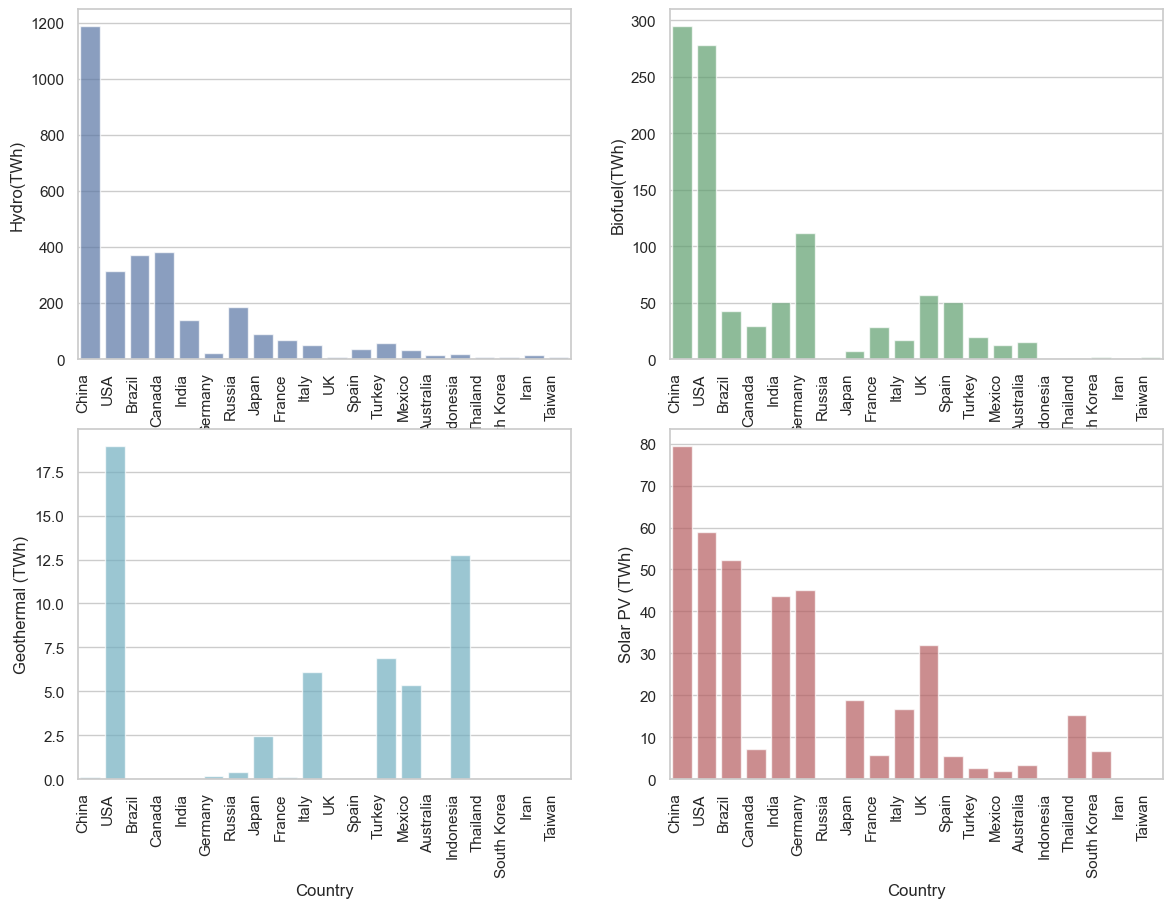

In [ ]:
# plotting for each renewable energy source
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

ax=sns.barplot(x='Country', y='Hydro(TWh)', data=top20_cpg, label='Hydro', color='b', alpha=0.7, ax=axes[0, 0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

ax=sns.barplot(x='Country', y='Biofuel(TWh)', data=top20_cpg, label='Biofuel', color='g', alpha=0.7, ax=axes[0, 1])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

ax=sns.barplot(x='Country', y='Solar PV (TWh)', data=top20_cpg, label='Solar PV', color='r', alpha=0.7,ax=axes[1, 1])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

ax=sns.barplot(x='Country', y='Geothermal (TWh)', data=top20_cpg, label='Geothermal', color='c', alpha=0.7, ax=axes[1, 0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')


plt.show()

#### Top 5 countries according to generation from the Renewable energy sources;

### Hydro

- China
- Canada
- Brazil
- USA
- Russia

### Biofuel

- China
- USA
- Germany
- India
- Brazil

### Geothermal

- USA
- Indonesia
- Turkey
- Italy
- Mexico

### Solar

- China
- USA
- Brazil
- Germany
- India

**We can see that China topped all the renewable energy types except Geothermal**

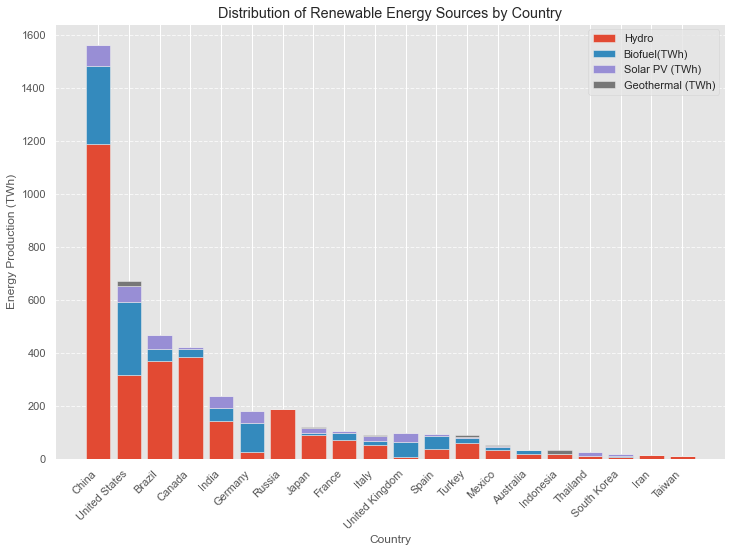

In [ ]:
# selecting columns for renewable energy types
renewable_cols = ["Hydro(TWh)", "Biofuel(TWh)", "Solar PV (TWh)", "Geothermal (TWh)"]

# creating a stacked bar chart to visualize the distribution of renewables
plt.figure(figsize=(12, 8))
plt.bar(top20_cpg["Country"], top20_cpg["Hydro(TWh)"], label="Hydro")
bottom = top20_cpg["Hydro(TWh)"]
for col in renewable_cols[1:]:
    plt.bar(top20_cpg["Country"], top20_cpg[col], label=col, bottom=bottom)
    bottom = bottom + top20_cpg[col]

plt.xlabel("Country")
plt.ylabel("Energy Production (TWh)")
plt.title("Distribution of Renewable Energy Sources by Country")
plt.legend()
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Hydro is the predominant renewable energy source in most countries**, with the exceptions being **Russia and Iran**, which **rely solely on Hydro** for their renewable energy generation. The United States primarily utilizes Biofuel, a pattern shared by Germany, the United Kingdom, and Spain. In the case of Indonesia, Geothermal and Hydro are the exclusive sources of renewable energy.

The reasons behind these patterns can vary and are often influenced by factors such as **geographic location, available natural resources, government policies**, and **historical energy infrastructure**.

For instance;

- **Hydro Dominance**: Many countries have abundant water resources suitable for hydroelectric power generation. It is a mature and reliable technology, making it a preferred choice for clean energy, especially in regions with rivers and water reservoirs.

- **Biofuel Emphasis**: The emphasis on Biofuel in the United States and some European countries may stem from their efforts to reduce greenhouse gas emissions and dependence on fossil fuels. These regions have invested significantly in biofuel production, driven by environmental and energy security concerns.

- **Geothermal Specialty**: Indonesia's reliance on Geothermal energy may be due to its unique geography and high volcanic activity. The country is rich in geothermal resources, making it a logical choice for sustainable energy generation.

- **National Policies**: Government policies, incentives, and subsidies can play a vital role in shaping a country's renewable energy landscape. They may encourage or discourage the adoption of specific renewable sources.

- **Economic and Technological Factors**: The availability of technology and economic factors, such as the cost-effectiveness of certain energy sources, also influence choices in renewable energy generation.



_Each country's energy mix is a result of a **complex interplay of these factors**, and it reflects the country's specific **circumstances** and **priorities**._

## Objective 3: How long will it take to meet global demands and eliminate non-renewables, or at least, break 50%?


-  By studying the dataset containing global energy consumption (Continent Consumption & Country Consumption) and global energy generation from renewable sources, we will estimate the future timeline for reaching global renewable energy goals.

In [ ]:
# creating an annual "Total" in the renewables table
renew_pg90["Total Renewable(TWh)"] = renew_pg90["Hydro(TWh)"] + renew_pg90["Biofuel(TWh)"] + renew_pg90["Solar PV (TWh)"] + renew_pg90["Geothermal (TWh)"]

# merging the "Continent_consumption" and "Renewable generation" datasets by Year
new_df = pd.merge(renew_pg90, conti_consu, on='Year', how='inner')

# displaying the merged dataset
new_df.head()

,Year,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh),Hydro Growth Rate(%),Biofuel Growth Rate(%),Solar PV Growth Rate(%),Geothermal Growth Rate(%),Total Renewable(TWh),...,OECD,BRICS,Europe,North America,Latin America,Asia,Pacific,Africa,Middle-East,CIS
0,1990,2191.67,3.88,0.09,36.42,NaN,NaN,NaN,NaN,2232.06,...,52602.49,26621.07,20654.88,24667.23,5373.06,24574.19,1197.89,4407.77,2581.86,16049.40
1,1991,2268.63,4.19,0.10,37.39,3.511478,7.989691,11.111111,2.663372,2310.31,...,53207.25,26434.99,20631.62,24841.68,5500.99,24783.53,1186.26,4535.70,2744.68,15898.21
2,1992,2267.16,4.63,0.12,39.30,-0.064797,10.501193,20.000000,5.108318,2311.21,...,53788.75,25993.05,20189.68,25341.77,5628.92,25690.67,1209.52,4582.22,3081.95,14339.79
3,1993,2397.67,5.61,0.15,40.23,5.756541,21.166307,25.000000,2.366412,2443.66,...,54614.48,26283.80,20189.68,25830.23,5675.44,26876.93,1267.67,4721.78,3349.44,13246.57
4,1994,2419.73,7.31,0.17,41.05,0.920060,30.303030,13.333333,2.038280,2468.26,...,55579.77,25993.05,20085.01,26365.21,5989.45,28098.08,1279.30,4803.19,3640.19,11606.74


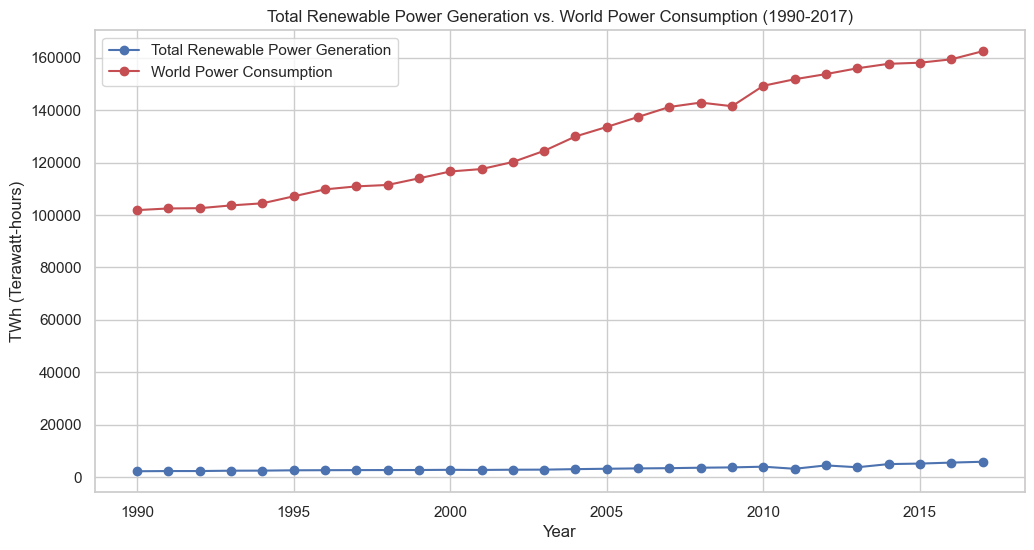

In [ ]:
# creating a line chart to visualize the Total Renewable Power Generation vs World Power Consumption
plt.figure(figsize=(12, 6))

plt.plot(new_df['Year'], new_df['Total Renewable(TWh)'], label='Total Renewable Power Generation', marker='o', linestyle='-', color='b')
plt.plot(new_df['Year'], new_df['World'], label='World Power Consumption', marker='o', linestyle='-', color='r')

plt.title('Total Renewable Power Generation vs. World Power Consumption (1990-2017)')
plt.xlabel('Year')
plt.ylabel('TWh (Terawatt-hours)')
plt.legend()
plt.grid(True)
plt.show()

# Modelling and Predictions


### Building a Simple Linear Regression(SLR) model to predict the annual 'Total Renewable(TWh)' generation based on the 'Year'


#### The equation for SLR is; y=mX+b
where; y - Target variable,
X - Feature,
m - Slope (coefficient) of the line(representing how much y changes for a unit change in X),
b - Intercept(representing the value of y when X is 0).

Note: **y = Total Renewable(TWh)** and   **X = Year**

In [ ]:
# extracting (Year - Feature) and (Total Renewable - Target Variable)
X = new_df['Year'].values.reshape(-1, 1)
y = new_df['Total Renewable(TWh)'].values

# creating and fitting a linear regression model on the extracted values
model = LinearRegression()
model.fit(X, y)

# predicting Total Renewable(y) from Year(X)
y_pred = model.predict(X)
y_pred

array([1835.23975369, 1946.23268199, 2057.22561029, 2168.21853859,
       2279.21146689, 2390.20439518, 2501.19732348, 2612.19025178,
       2723.18318008, 2834.17610837, 2945.16903667, 3056.16196497,
       3167.15489327, 3278.14782157, 3389.14074986, 3500.13367816,
       3611.12660646, 3722.11953476, 3833.11246305, 3944.10539135,
       4055.09831965, 4166.09124795, 4277.08417625, 4388.07710454,
       4499.07003284, 4610.06296114, 4721.05588944, 4832.04881773])

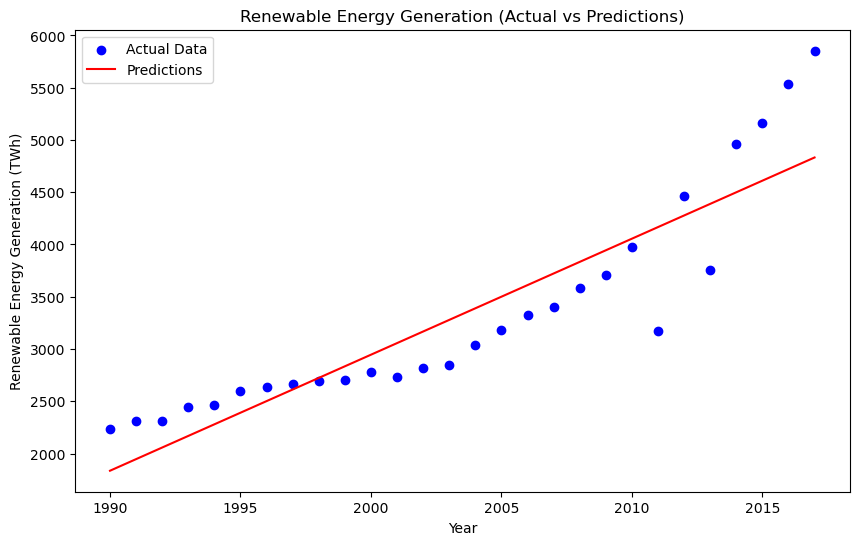

In [ ]:
# plotting the actual data vs predictions
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Predictions')
plt.xlabel('Year')
plt.ylabel('Renewable Energy Generation (TWh)')
plt.title('Renewable Energy Generation (Actual vs Predictions)')
plt.legend()
plt.show()

In [ ]:
# calculating the Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) for evaluation
rmse_cal = np.sqrt(mean_squared_error(y, y_pred))
mae_cal = mean_absolute_error(y, y_pred)

# printing the RMSE and MAE rounded to three decimal places
print(f"Root Mean Squared Error: {rmse_cal:.3f}")
print(f"Mean Absolute Error: {mae_cal:.3f}")

Root Mean Squared Error: 429.128
Mean Absolute Error: 350.073


Deductions from MAE and RMSE values;

- The MAE value indicates that the average distance between our Model's predictions and the actual values is about **350TWh**
- The RMSE, which is a better performance evaluator, puts the average distance between the actual and predicted values at **429.128TWh**

Considering the range of our Renewable generation values (about 2,000 - about 6,000TWh), it looks like **our MAE and RMSE values are small showing a good Model performance**.

In [ ]:
g = np.array([[2018],[2019],[2020],[2021],[2022],[2023],[2024],[2025]])
model.predict(g)

array([4943.04174603, 5054.03467433, 5165.02760263, 5276.02053093,
       5387.01345922, 5498.00638752, 5608.99931582, 5719.99224412])

In [ ]:
h = np.array([[2040],[2050],[2090]])
model.predict(h)

array([ 7384.88616858,  8494.81545156, 12934.53258347])

These are some deductions from our Renewable Generation Model predictions;
- Renewable energy generation should be hitting at **least 5,100TWh by 2020**
- By **2025**, the generation should be at a **minimum of 5,700TWh**
- By **2040**, the World should be generating **over 7,200TWh** in Renewable energy and **just under 13k TWh by 2090**!

### Building a SLR to predict World Energy Consumption based on Year

In [ ]:
# extracting (Year - Feature) and (World Consumption - Target Variable)
XX = new_df['Year'].values.reshape(-1, 1)
yy = new_df['World'].values

# creating and fitting a linear regression model on the extracted values
con_model = LinearRegression()
con_model.fit(XX, yy)

# predicting World Consumption(yy) from Year(XX)
yy_pred = con_model.predict(XX)
yy_pred

array([ 95073.96096059,  97613.18081007, 100152.40065955, 102691.62050903,
       105230.84035851, 107770.06020799, 110309.28005747, 112848.49990695,
       115387.71975643, 117926.93960591, 120466.15945539, 123005.37930487,
       125544.59915435, 128083.81900383, 130623.03885331, 133162.25870279,
       135701.47855227, 138240.69840175, 140779.91825123, 143319.13810071,
       145858.35795019, 148397.57779967, 150936.79764915, 153476.01749863,
       156015.23734811, 158554.45719759, 161093.67704707, 163632.89689655])

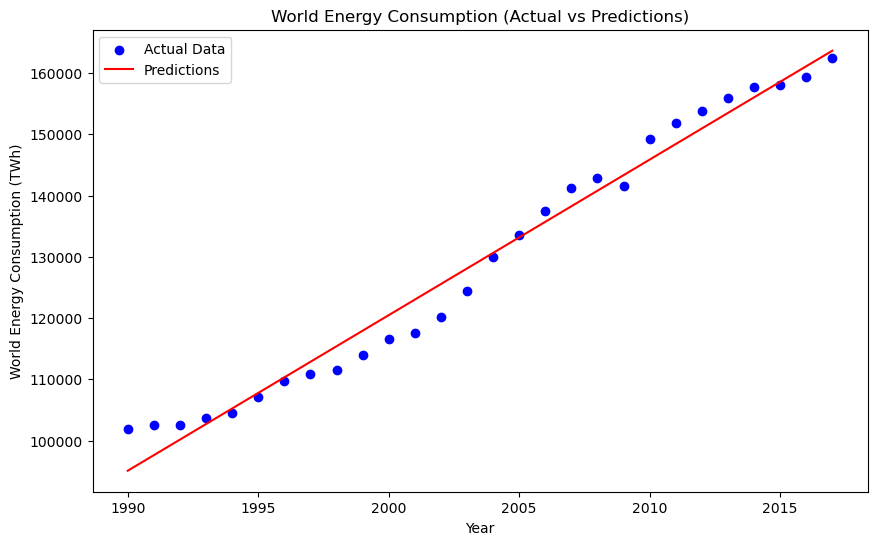

In [ ]:
# plotting the actual data vs predictions
plt.figure(figsize=(10, 6))
plt.scatter(XX, yy, color='blue', label='Actual Data')
plt.plot(XX, yy_pred, color='red', label='Predictions')
plt.xlabel('Year')
plt.ylabel('World Energy Consumption (TWh)')
plt.title('World Energy Consumption (Actual vs Predictions)')
plt.legend()
plt.show()

In [ ]:
# calculating the Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) for evaluation
rmse_calc = np.sqrt(mean_squared_error(yy, yy_pred))
mae_calc = mean_absolute_error(yy, yy_pred)

# printing the RMSE and MAE rounded to three decimal places
print(f"Root Mean Squared Error: {rmse_calc:.3f}")
print(f"Mean Absolute Error: {mae_calc:.3f}")

Root Mean Squared Error: 3071.476
Mean Absolute Error: 2570.832


Deductions from our Model metrics (MAE and RMSE);

- Our MAE is showing that our Model's predictions are averagely **2,570.832TWh** away from the actual values
- The RMSE is saying that the average distance between predicted and actual values is about **3,071TWh**

The range of World Energy consumption values is around 60,000TWh which is much higher than our MAE and RMSE values. This hints to a **good performance from our Model**.

In [ ]:
gg = np.array([[2018],[2019],[2020],[2021],[2022],[2023],[2024],[2025]])
con_model.predict(gg)

array([166172.11674603, 168711.33659551, 171250.55644499, 173789.77629447,
       176328.99614395, 178868.21599343, 181407.43584291, 183946.65569239])

In [ ]:
hh = np.array([[2040],[2050],[2090]])
con_model.predict(hh)

array([222034.95343459, 247427.15192939, 348995.94590859])

These are some deductions from our World Consumption Model predictions;
- World Energy Consumption should be hitting at **least 170,000TWh by 2020**
- By **2025**, the Consumption should be at a **minimum of 181,000TWh**
- By **2040**, the World should be consuming **over 220,000TWh** and **just under 350,000TWh by 2090**!

Although our Models seem to be doing fairly well based on the performance metrics, the NeuralNex team reasoned that **"Year" is not a sufficient predictor** for Global Consumption or Renewable generation. There could be other factors(Technological advancements, Government policies, Outbreak/Pandemic and so on) that may influence the performance of these target variables.

Based on the data at our disposal, we will be doing some **Feature Engineering** by creating some new time-related variables to use as features for our Multiple Linear Regression model.

In [ ]:
# checking new_df
print(f'new_df has {new_df.shape[0]} rows and {new_df.shape[1]} columns')
new_df.head()

new_df has 28 rows and 21 columns


,Year,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh),Hydro Growth Rate(%),Biofuel Growth Rate(%),Solar PV Growth Rate(%),Geothermal Growth Rate(%),Total Renewable(TWh),...,OECD,BRICS,Europe,North America,Latin America,Asia,Pacific,Africa,Middle-East,CIS
0,1990,2191.67,3.88,0.09,36.42,NaN,NaN,NaN,NaN,2232.06,...,52602.49,26621.07,20654.88,24667.23,5373.06,24574.19,1197.89,4407.77,2581.86,16049.40
1,1991,2268.63,4.19,0.10,37.39,3.511478,7.989691,11.111111,2.663372,2310.31,...,53207.25,26434.99,20631.62,24841.68,5500.99,24783.53,1186.26,4535.70,2744.68,15898.21
2,1992,2267.16,4.63,0.12,39.30,-0.064797,10.501193,20.000000,5.108318,2311.21,...,53788.75,25993.05,20189.68,25341.77,5628.92,25690.67,1209.52,4582.22,3081.95,14339.79
3,1993,2397.67,5.61,0.15,40.23,5.756541,21.166307,25.000000,2.366412,2443.66,...,54614.48,26283.80,20189.68,25830.23,5675.44,26876.93,1267.67,4721.78,3349.44,13246.57
4,1994,2419.73,7.31,0.17,41.05,0.920060,30.303030,13.333333,2.038280,2468.26,...,55579.77,25993.05,20085.01,26365.21,5989.45,28098.08,1279.30,4803.19,3640.19,11606.74


In [ ]:
# creating a column showing the no. of years from the first year up to each Year
new_df['Yrs_Snc_Str'] = new_df['Year'] - new_df['Year'].min()

# creating a column for % renewable annual contribution
new_df['Renew_contri(%)'] = (new_df['Total Renewable(TWh)'] / new_df['World']) * 100

# creating columns showing renewable generation and world consumption % growth rate
new_df['Renew_rate(%)'] = new_df['Total Renewable(TWh)'].pct_change() * 100
new_df['World_consu_rate(%)'] = new_df['World'].pct_change() * 100

In [ ]:
# checking for added columns
print(f'new_df has {new_df.shape[0]} rows and {new_df.shape[1]} columns')
new_df.head()

new_df has 28 rows and 25 columns


,Year,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh),Hydro Growth Rate(%),Biofuel Growth Rate(%),Solar PV Growth Rate(%),Geothermal Growth Rate(%),Total Renewable(TWh),...,Latin America,Asia,Pacific,Africa,Middle-East,CIS,Yrs_Snc_Str,Renew_contri(%),Renew_rate(%),World_consu_rate(%)
0,1990,2191.67,3.88,0.09,36.42,NaN,NaN,NaN,NaN,2232.06,...,5373.06,24574.19,1197.89,4407.77,2581.86,16049.40,0,2.191398,NaN,NaN
1,1991,2268.63,4.19,0.10,37.39,3.511478,7.989691,11.111111,2.663372,2310.31,...,5500.99,24783.53,1186.26,4535.70,2744.68,15898.21,1,2.254323,3.505730,0.616579
2,1992,2267.16,4.63,0.12,39.30,-0.064797,10.501193,20.000000,5.108318,2311.21,...,5628.92,25690.67,1209.52,4582.22,3081.95,14339.79,2,2.252900,0.038956,0.102133
3,1993,2397.67,5.61,0.15,40.23,5.756541,21.166307,25.000000,2.366412,2443.66,...,5675.44,26876.93,1267.67,4721.78,3349.44,13246.57,3,2.357686,5.730764,1.031629
4,1994,2419.73,7.31,0.17,41.05,0.920060,30.303030,13.333333,2.038280,2468.26,...,5989.45,28098.08,1279.30,4803.19,3640.19,11606.74,4,2.363124,1.006687,0.774237


In [ ]:
# selecting our desired features and target for better visibility
dff90_17 = new_df[["Year", "Total Renewable(TWh)", "World", "Yrs_Snc_Str", "Renew_contri(%)", "Renew_rate(%)", "World_consu_rate(%)"]]

In [ ]:
# checking dff90_17
print(f'dff90_17 has {dff90_17.shape[0]} rows and {dff90_17.shape[1]} columns')
dff90_17.head()

dff90_17 has 28 rows and 7 columns


,Year,Total Renewable(TWh),World,Yrs_Snc_Str,Renew_contri(%),Renew_rate(%),World_consu_rate(%)
0,1990,2232.06,101855.54,0,2.191398,NaN,NaN
1,1991,2310.31,102483.56,1,2.254323,3.505730,0.616579
2,1992,2311.21,102588.23,2,2.252900,0.038956,0.102133
3,1993,2443.66,103646.56,3,2.357686,5.730764,1.031629
4,1994,2468.26,104449.03,4,2.363124,1.006687,0.774237


In [ ]:
# inspecting NULLs - NaN were due to the fact that there was no previous year to calculate
dff90_17.isna().sum()

Year                    0
Total Renewable(TWh)    0
World                   0
Yrs_Snc_Str             0
Renew_contri(%)         0
Renew_rate(%)           1
World_consu_rate(%)     1
dtype: int64

In [ ]:
# filling the first values in our growth rate columns with "0" indicating the starting point of values
df90 = dff90_17.fillna(0)
df90.head()

,Year,Total Renewable(TWh),World,Yrs_Snc_Str,Renew_contri(%),Renew_rate(%),World_consu_rate(%)
0,1990,2232.06,101855.54,0,2.191398,0.000000,0.000000
1,1991,2310.31,102483.56,1,2.254323,3.505730,0.616579
2,1992,2311.21,102588.23,2,2.252900,0.038956,0.102133
3,1993,2443.66,103646.56,3,2.357686,5.730764,1.031629
4,1994,2468.26,104449.03,4,2.363124,1.006687,0.774237


In [ ]:
# checking for correlation for Features
df90.corr()

,Year,Total Renewable(TWh),World,Yrs_Snc_Str,Renew_contri(%),Renew_rate(%),World_consu_rate(%)
Year,1.000000,0.902004,0.988973,1.000000,0.705831,0.212887,0.144591
Total Renewable(TWh),0.902004,1.000000,0.897565,0.902004,0.936074,0.393272,-0.009807
World,0.988973,0.897565,1.000000,0.988973,0.686630,0.221530,0.136439
Yrs_Snc_Str,1.000000,0.902004,0.988973,1.000000,0.705831,0.212887,0.144591
Renew_contri(%),0.705831,0.936074,0.686630,0.705831,1.000000,0.484752,-0.116853
Renew_rate(%),0.212887,0.393272,0.221530,0.212887,0.484752,1.000000,0.021922
World_consu_rate(%),0.144591,-0.009807,0.136439,0.144591,-0.116853,0.021922,1.000000


From the correlation matrix above;

- We see that the "Yrs_Snc_Str" has **perfect correlation** with our "Year" which means using these two columns as predictors will lead to the **issue of Multicollinearity**
- The columns "Renew_contri(%)", "Renew_rate(%)" and "World_consu_rate(%)" have **low correlation with one another** showing that they are **independent** of themselves and can therefore be appropriate predictors

## Multiple Linear Regression(MLR) models to predict 'Global Energy Consumption' & 'global Renewable Energy generation' based on;

- ### 'Year'
- ### 'Percentage annual Renewable contribution'
- ### 'Yearly growth rate of Renewable generation'
- ### 'Yearly growth rate of World consumption'

#### The equation for MLR is; y = β0 + β1X1 + β2X2 + … + βpXp + ε
where;
- y - dependent variable (the variable(s) I want to predict),
- β0 - intercept (the value of Y when all predictor variables are 0),
- β1 to βp - coefficients of the predictor variables,
- X1 to Xp - predictor variables (features),
- ε - error term, which captures the unexplained variation in Y.

In [ ]:
# defining the target variable and the features
X1 = df90[["Year", "Renew_contri(%)", "Renew_rate(%)", "World_consu_rate(%)"]]
y1 = df90["World"]

# splitting the data into a training set and a test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=50)

# normalizing the dataset using MinMaxScaler
scaler = MinMaxScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

# creating and training the World Consumption MLR model
mlr_consu_model = LinearRegression()
mlr_consu_model.fit(X1_train, y1_train)

# making predictions on the train and test sets
y_pred_t = mlr_consu_model.predict(X1_train)
y_pred_te = mlr_consu_model.predict(X1_test)

In [ ]:
# calculating Mean Absolute Error(MAE) for train
mae_tr = mean_absolute_error(y1_train, y_pred_t)
print(f"The MAE for the train set is {mae_tr:.3f}")

# calculating Root Mean Squared Error(RMSE) for train
rmse_tr = np.sqrt(mean_squared_error(y1_train, y_pred_t))
print(f"The RMSE for the train set is {rmse_tr:.3f}")

# calculating Mean Absolute Error(MAE) for test
mae_te = mean_absolute_error(y1_test, y_pred_te)
print(f"The MAE for the test set is {mae_te:.3f}")

# calculating Root Mean Squared Error(RMSE) for test
rmse_te = np.sqrt(mean_squared_error(y1_test, y_pred_te))
print(f"The RMSE for the test set is {rmse_te:.3f}")

The MAE for the train set is 2325.807
The RMSE for the train set is 2954.594
The MAE for the test set is 3698.597
The RMSE for the test set is 3871.940


- Although this model is doing **better than the SLR model on World Consumption prediction** (because the values are lower - *like this RMSE of 2325.807 is **significantly lower** than the 3071.476 of the SLR*), it seems to have overfit our data when we compare the metrics on the train and set.

- We posit to drop **"Renew_contri(%)"** as a Feature since it has a bit of Correlation with "Year" and might be causing **multicollinearity**.

In [ ]:
# defining the target variable and the features
X2 = df90[["Year", "Renew_rate(%)", "World_consu_rate(%)"]]
y2 = df90["World"]

# splitting the data into a training set and a test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=50)

# normalizing the dataset using MinMaxScaler
scaler = MinMaxScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

# creating and training the World Consumption MLR model
mlr_consu_model = LinearRegression()
mlr_consu_model.fit(X2_train, y2_train)

# making predictions on the train and test sets
y_pred_t2 = mlr_consu_model.predict(X2_train)
y_pred_te2 = mlr_consu_model.predict(X2_test)

In [ ]:
# calculating Mean Absolute Error(MAE) for train
mae_tr2 = mean_absolute_error(y2_train, y_pred_t2)
print(f"The MAE for the train set is {mae_tr2:.3f}")

# calculating Root Mean Squared Error(RMSE) for train
rmse_tr2 = np.sqrt(mean_squared_error(y2_train, y_pred_t2))
print(f"The RMSE for the train set is {rmse_tr2:.3f}")

# calculating Mean Absolute Error(MAE) for test
mae_te2 = mean_absolute_error(y2_test, y_pred_te2)
print(f"The MAE for the test set is {mae_te2:.3f}")

# calculating Root Mean Squared Error(RMSE) for test
rmse_te2 = np.sqrt(mean_squared_error(y2_test, y_pred_te2))
print(f"The RMSE for the test set is {rmse_te2:.3f}")

The MAE for the train set is 2421.951
The RMSE for the train set is 2995.558
The MAE for the test set is 2870.690
The RMSE for the test set is 3302.175


- This model performs more favorably than previous ones

### Now to predict Renewable Generation

In [ ]:
# defining the target variable and the features
X4 = df90[["Year", "Renew_rate(%)", "World_consu_rate(%)"]]
y4 = df90["Total Renewable(TWh)"]

# splitting the data into a training set and a test set
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=50)

# normalizing the dataset using MinMaxScaler
scaler = MinMaxScaler()
X4_train = scaler.fit_transform(X4_train)
X4_test = scaler.transform(X4_test)

# creating and training the Renewable Generation MLR model
mlr_gen_model = LinearRegression()
mlr_gen_model.fit(X4_train, y4_train)

# making predictions on the train and test sets
y_pred_t4 = mlr_gen_model.predict(X4_train)
y_pred_te4 = mlr_gen_model.predict(X4_test)

In [ ]:
# calculating Mean Absolute Error(MAE) for train
mae_tr3 = mean_absolute_error(y4_train, y_pred_t4)
print(f"The MAE for the train set is {mae_tr3:.3f}")

# calculating Root Mean Squared Error(RMSE) for train
rmse_tr3 = np.sqrt(mean_squared_error(y4_train, y_pred_t4))
print(f"The RMSE for the train set is {rmse_tr3:.3f}")

# calculating Mean Absolute Error(MAE) for test
mae_te3 = mean_absolute_error(y4_test, y_pred_te4)
print(f"The MAE for the test set is {mae_te3:.3f}")

# calculating Root Mean Squared Error(RMSE) for test
rmse_te3 = np.sqrt(mean_squared_error(y4_test, y_pred_te4))
print(f"The RMSE for the test set is {rmse_te3:.3f}")

The MAE for the train set is 107.761
The RMSE for the train set is 144.168
The MAE for the test set is 514.780
The RMSE for the test set is 786.219


- We see that our model does well on the train set but overfits our data
- We will go ahead to do some more Feature Engineering to see how it influence our model

In [ ]:
# defining the target variable and the features
X5 = df90[["Year", "World_consu_rate(%)"]]
y5 = df90["Total Renewable(TWh)"]

# splitting the data into a training set and a test set
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state=50)

# normalizing the dataset using MinMaxScaler
scaler = MinMaxScaler()
X5_train = scaler.fit_transform(X5_train)
X5_test = scaler.transform(X5_test)

# creating and training the Renewable Generation MLR model
mlr_gen_model = LinearRegression()
mlr_gen_model.fit(X5_train, y5_train)

# making predictions on the train and test sets
y_pred_t5 = mlr_gen_model.predict(X5_train)
y_pred_te5 = mlr_gen_model.predict(X5_test)

In [ ]:
# calculating Mean Absolute Error(MAE) for train
mae_tr5 = mean_absolute_error(y5_train, y_pred_t5)
print(f"The MAE for the train set is {mae_tr5:.3f}")

# calculating Root Mean Squared Error(RMSE) for train
rmse_tr5 = np.sqrt(mean_squared_error(y5_train, y_pred_t5))
print(f"The RMSE for the train set is {rmse_tr5:.3f}")

# calculating Mean Absolute Error(MAE) for test
mae_te5 = mean_absolute_error(y5_test, y_pred_te5)
print(f"The MAE for the test set is {mae_te5:.3f}")

# calculating Root Mean Squared Error(RMSE) for test
rmse_te5 = np.sqrt(mean_squared_error(y5_test, y_pred_te5))
print(f"The RMSE for the test set is {rmse_te5:.3f}")

The MAE for the train set is 223.270
The RMSE for the train set is 303.512
The MAE for the test set is 484.184
The RMSE for the test set is 662.190


### Trying other models